# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import joblib
from sklearn.decomposition import PCA
from collections import defaultdict
from geopy.distance import geodesic

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 10 baris pertama dengan function `head()`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info()`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe()`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [51]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

df.head(10)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 08:06:36
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Credit,Seattle,D000241,140.212.253.222,M019,ATM,37.0,Doctor,139.0,1.0,13316.71,2024-11-04 08:10:09
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Credit,Indianapolis,D000500,92.214.76.157,M020,Branch,67.0,Retired,291.0,1.0,2796.24,2024-11-04 08:10:55
8,TX000009,AC00135,106.23,2023-03-21 16:59:46,Credit,Detroit,D000690,24.148.92.177,M035,Branch,51.0,Engineer,86.0,1.0,9095.14,2024-11-04 08:11:14
9,TX000010,AC00385,815.96,2023-03-31 16:06:57,Debit,Nashville,D000199,32.169.88.41,M007,ATM,55.0,Doctor,120.0,1.0,1021.88,2024-11-04 08:06:32


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [53]:
df.describe(include='all')

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2508,2516,2511.000000,2509,2507,2507,2507,2517,2514,2510,2519.000000,2514,2511.000000,2516.000000,2510.000000,2513
unique,2484,495,NaN,2485,2,43,681,591,100,3,NaN,4,NaN,NaN,NaN,360
top,TX001748,AC00362,NaN,2023-10-20 17:53:13,Debit,Fort Worth,D000573,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,2,12,NaN,2,1942,71,9,12,46,868,NaN,657,NaN,NaN,NaN,18
mean,NaN,NaN,297.656468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.678444,NaN,119.422939,1.121622,5113.438124,NaN
std,NaN,NaN,292.230367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.837359,NaN,70.078513,0.594469,3897.975861,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.310000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.727500,NaN
50%,NaN,NaN,211.360000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.000000,1.000000,4734.110000,NaN
75%,NaN,NaN,413.105000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7672.687500,NaN


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

<Axes: >

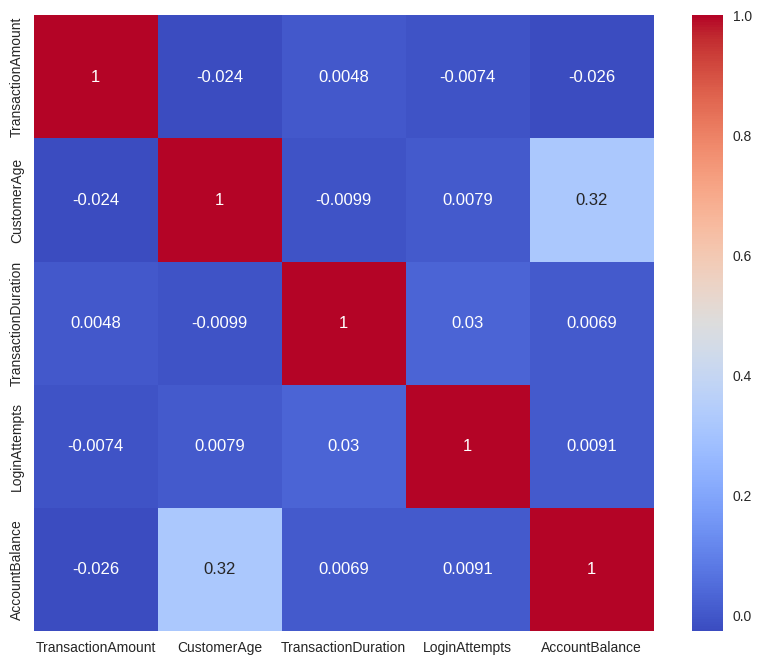

In [54]:
numeric_columns = df.select_dtypes(include=np.number).columns


plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')

Insight:
- Sebagian besar fitur tidak berkorelasi kuat satu sama lain, kecuali pada kolom 'AccountBalance' dengan 'CustomerAge' dengan nilai korelasi 0.32, bisa diartikan bahwa, semakin tua pelanggan semakin besar pula saldo yang dimilikinya

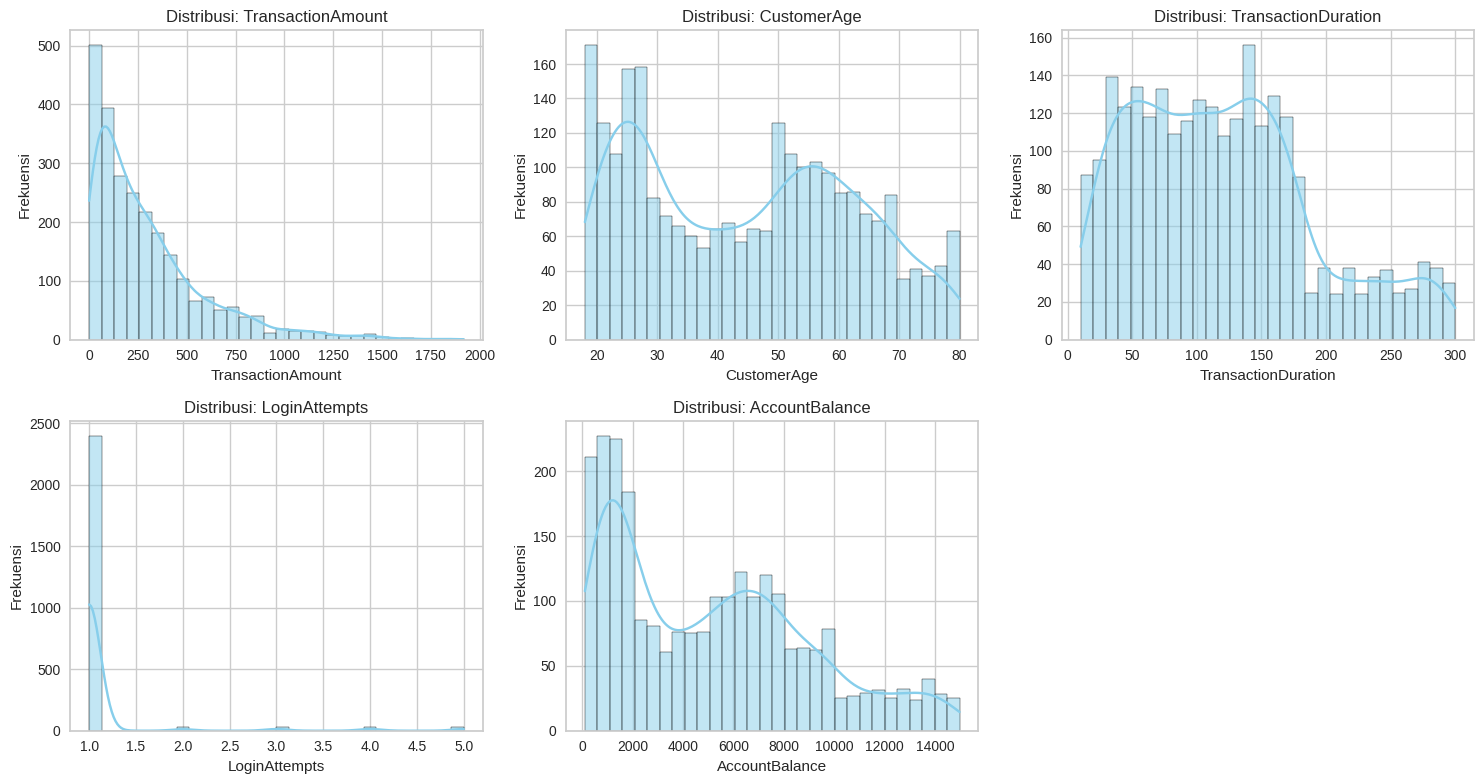

In [55]:
plt.figure(figsize=(15, 8))

# Plot histogram untuk setiap kolom numerik
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribusi: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

Insight:
- Kolom 'TransactionAmount' distribusi right-skewed, dengan distribusi terbesar dikisaran sebelum nilai transaksi 250
- Kolom 'CustomerAge' distribusinya cukup merata dengan umur yang memeliki frekuensi paling banyak ada di 20-30 dan paling sedikit ada di 30 - 50
- Kolom 'TransactionDuration' distribusinya juga cukup merata pada durasi kecil hingga pertengahan, lalu menurun pada durasi panjang
- Kolom 'LoginAttempts' distribusi nilai rata-rata terfokus pada hanya satu percobaan login saja
- Kolom 'AccountBalance' distribusi right-skewed tetapi terdapat beberapa puncak, dengan puncak tertinggi ada pada kurang dari 2000 saldo akun

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

<Axes: xlabel='CustomerOccupation', ylabel='count'>

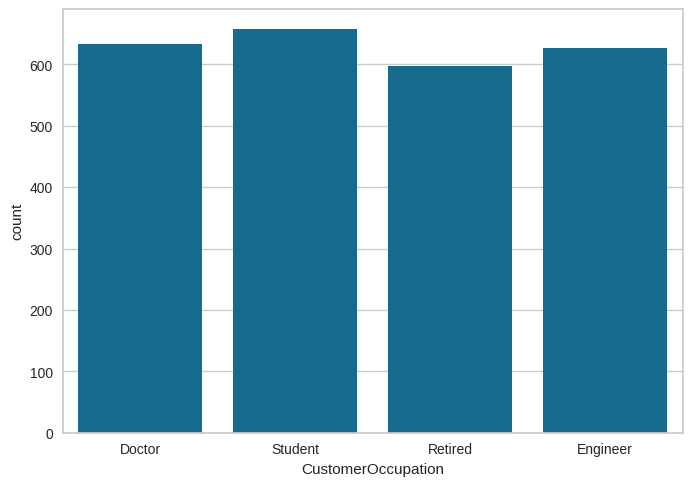

In [56]:
sns.countplot(x='CustomerOccupation', data=df)

Insight:
- ternyata distribusi pekerjaan pelanggan cukup merata frekuensinya dengan pekerjaan pelanggan yang paling banyak adalah murid

/tmp/ipython-input-57-2414148406.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_amount = df_visual['TransactionAmount'].resample('M').sum()


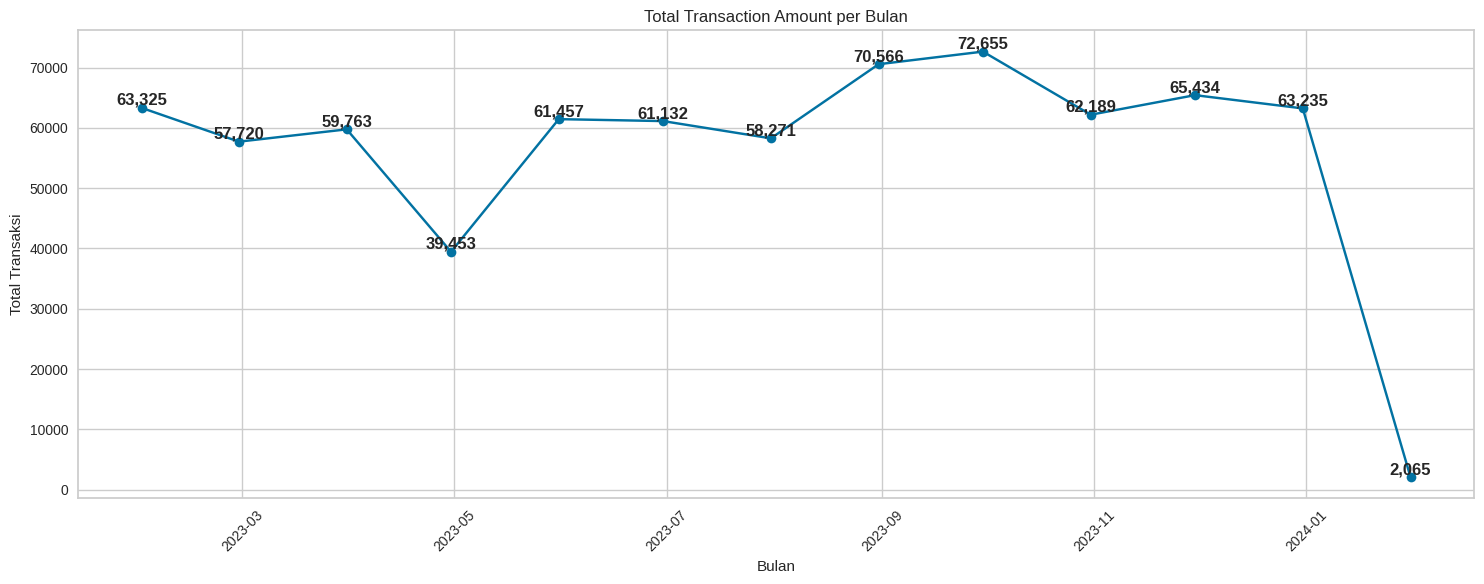

In [57]:
# Pastikan kolom tanggal dalam format datetime
df_visual = df[['TransactionDate', 'TransactionAmount']].copy()

df_visual['TransactionDate'] = pd.to_datetime(df_visual['TransactionDate'])

# Set kolom tanggal sebagai index
df_visual.set_index('TransactionDate', inplace=True)

# Hitung total transaksi per bulan
monthly_amount = df_visual['TransactionAmount'].resample('M').sum()

# Visualisasi
plt.figure(figsize=(15, 6))
plt.plot(monthly_amount.index, monthly_amount.values, marker='o', linestyle='-')
plt.title('Total Transaction Amount per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Transaksi')
plt.grid(True)
plt.xticks(rotation=45)

# Tambahkan label jumlah transaksi di atas titik
for x, y in zip(monthly_amount.index, monthly_amount.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

Insight:
- Total transaksi setiap bulannya cukup merata walau ada penurunan pada bulan 05 dengan puncaknya ada di bulan 09 sampai 11

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `pd.get_dummies()` atau `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


**Cek Missing Value**

In [58]:
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


Insight:
- Terdapat missing value pada seluruh kolom dataset

**Cek Data Duplikat**

In [59]:
# Mengecek dataset menggunakan duplicated().sum()
dup = df.duplicated().sum()

print('Jumlah data duplikat :', dup)

Jumlah data duplikat : 21


**Feature Scaling**

In [60]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
df_clean = df.copy()
scaler = StandardScaler()
df_clean[numeric_columns] = scaler.fit_transform(df_clean[numeric_columns])

Penjelasan:
- menggunakan standard scaler untuk feature scaling
- membuat copy dari dataset asli agar nilai dari dataset asli tidak terubah

In [61]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

Penjelasan:
- Ada kesalahan tipe data pada kolom "TransactionDate" dan "PreviousTransactionDate" yang seharusnya adalah bertipe datetime

**Cek Unique Value**

In [62]:
df_clean.describe(include='all')

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2508,2516,2.511000e+03,2509,2507,2507,2507,2517,2514,2510,2.519000e+03,2514,2.511000e+03,2.516000e+03,2.510000e+03,2513
unique,2484,495,NaN,2485,2,43,681,591,100,3,NaN,4,NaN,NaN,NaN,360
top,TX001748,AC00362,NaN,2023-10-20 17:53:13,Debit,Fort Worth,D000573,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,2,12,NaN,2,1942,71,9,12,46,868,NaN,657,NaN,NaN,NaN,18
mean,NaN,NaN,1.542197e-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.029568e-16,NaN,-5.659440e-17,-1.496771e-16,1.624199e-16,NaN
std,NaN,NaN,1.000199e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000199e+00,NaN,1.000199e+00,1.000199e+00,1.000199e+00,NaN
min,NaN,NaN,-1.017881e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.495947e+00,NaN,-1.561745e+00,-2.046294e-01,-1.286100e+00,NaN
25%,NaN,NaN,-7.404760e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.912877e-01,NaN,-8.052993e-01,-2.046294e-01,-9.259754e-01,NaN
50%,NaN,NaN,-2.953617e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.803070e-02,NaN,-1.059443e-01,-2.046294e-01,-9.733352e-02,NaN
75%,NaN,NaN,3.951387e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.030561e-01,NaN,5.934107e-01,-2.046294e-01,6.566894e-01,NaN


Penjelasan:
- Melakukan pengecekan unique value untuk menentukan jenis encoding apa yang cocok untuk tiap kolom
- dikarenakan kolom 'TransactionType','Channel', dan 'CustomerOccupation' memiliki unique values yang sedikit, maka saya memutuskan untuk menggunakan one-hot encoding pada kolom tersebut
- untuk kolom yang lainnya dikarenakan memiliki unique values yang cukup banyak, saya memutuskan untuk menggunakan label encoder saja agar dimensi dari dataset tidak terlalu besar

**Feature Encoding pada Fitur Kategorikal**

In [63]:
# Melakukan feature encoding menggunakan pd.get_dummies() atau LabelEncoder() untuk fitur kategorikal.

# Salin dataframe untuk preprocessing
df_encoded = df_clean.copy()

# Daftar kolom kategorikal
categorical_cols = df_encoded.select_dtypes(include='object').columns

# Kolom dengan kategori sedikit → gunakan One-Hot Encoding
onehot_cols = ['TransactionType', 'Channel', 'CustomerOccupation']  # Contoh, sesuaikan dengan data kamu
df_encoded = pd.get_dummies(df_encoded, columns=onehot_cols, drop_first=True)

# # Kolom dengan kategori banyak → gunakan Label Encoding
# label_cols = ['DeviceID']  # Contoh, sesuaikan dengan data kamu

# # Label encoding
# le = LabelEncoder()
# for col in label_cols:
#     df_encoded[col] = le.fit_transform(df_encoded[col])

# Cek hasil encoding
df_encoded.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,Location,DeviceID,IP Address,MerchantID,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionType_Debit,Channel_Branch,Channel_Online,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,TX000001,AC00128,-0.970546,2023-04-11 16:29:14,San Diego,D000380,162.198.218.92,M015,1.419862,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08,True,False,False,False,False,False
1,TX000002,AC00455,0.268963,2023-06-27 16:44:19,Houston,D000051,13.149.61.4,M052,1.307715,0.307960,-0.204629,2.218381,2024-11-04 08:09:35,True,False,False,False,False,False
2,TX000003,AC00019,-0.586526,2023-07-10 18:16:08,Mesa,D000235,215.97.143.157,M009,-1.439874,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04,True,False,True,False,False,True
3,TX000004,AC00070,-0.387294,2023-05-05 16:32:11,Raleigh,D000187,200.13.225.150,M002,-1.047361,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06,True,False,True,False,False,True
4,TX000005,AC00411,-0.972736,2023-10-16 17:51:24,Atlanta,D000308,65.164.3.100,M091,NaN,1.121495,-0.204629,0.594263,2024-11-04 08:06:39,False,False,True,False,False,True


Penjelasan:
- Feature encoding sudah berhasil dilakukan dengan menggunakan dataset copy agar ada backup jika diperlukan, karena disini saya ingin menghapus kolom aslinya setelah melakukan encoding

Spatial Feature Engineering

In [64]:
city_coords = {
    'San Diego': (32.7157, -117.1611),
    'Houston': (29.7604, -95.3698),
    'Mesa': (33.4152, -111.8315),
    'Raleigh': (35.7796, -78.6382),
    'Atlanta': (33.7490, -84.3880),
    'Oklahoma City': (35.4676, -97.5164),
    'Seattle': (47.6062, -122.3321),
    'Indianapolis': (39.7684, -86.1581),
    'Detroit': (42.3314, -83.0458),
    'Nashville': (36.1627, -86.7816),
    'Albuquerque': (35.0844, -106.6504),
    'Memphis': (35.1495, -90.0490),
    'Louisville': (38.2527, -85.7585),
    'Denver': (39.7392, -104.9903),
    'Austin': (30.2672, -97.7431),
    'Columbus': (39.9612, -82.9988),
    'Los Angeles': (34.0522, -118.2437),
    'Las Vegas': (36.1699, -115.1398),
    'Fort Worth': (32.7555, -97.3308),
    'Miami': (25.7617, -80.1918),
    'Milwaukee': (43.0389, -87.9065),
    'Baltimore': (39.2904, -76.6122),
    'New York': (40.7128, -74.0060),
    'San Francisco': (37.7749, -122.4194),
    'San Jose': (37.3382, -121.8863),
    'San Antonio': (29.4241, -98.4936),
    'Philadelphia': (39.9526, -75.1652),
    'Charlotte': (35.2271, -80.8431),
    'Tucson': (32.2226, -110.9747),
    'Chicago': (41.8781, -87.6298),
    'Sacramento': (38.5816, -121.4944),
    'Kansas City': (39.0997, -94.5786),
    'Omaha': (41.2565, -95.9345),
    'Virginia Beach': (36.8529, -75.9780),
    'Dallas': (32.7767, -96.7970),
    'Boston': (42.3601, -71.0589),
    'Jacksonville': (30.3322, -81.6557),
    'Phoenix': (33.4484, -112.0740),
    'Washington': (38.9072, -77.0369),
    'El Paso': (31.7619, -106.4850),
    'Colorado Springs': (38.8339, -104.8214),
    'Fresno': (36.7378, -119.7871),
    'Portland': (45.5152, -122.6784)
}

df_encoded['Latitude'] = df_encoded['Location'].map(lambda x: city_coords.get(x, (None, None))[0])
df_encoded['Longitude'] = df_encoded['Location'].map(lambda x: city_coords.get(x, (None, None))[1])

nyc_coords = (40.7128, -74.0060)
df_encoded['LocationCoords'] = df_encoded[['Latitude', 'Longitude']].apply(
    lambda row: geodesic(nyc_coords, (row['Latitude'], row['Longitude'])).km if pd.notnull(row['Latitude']) else None,
    axis=1
)

Penjelasan:
- Saya melakukan spatial feature engineering pada kolom 'Location' untuk mengubah data kategorikal kota menjadi fitur numerik yang bermakna.
- Dengan melakukan pemetaan setiap kota ke koordinat geografisnya (latitude dan longitude) menggunakan dictionary city_coords (sebelumnya saya sudah coba menggunakan Nominatim tetapi membutuhkan waktu yang sangat-sangat lama).
- Kemudian, saya menghitung jarak geografis antara setiap kota dalam data dan kota New York City (NYC) sebagai pusat acuan(karena NYC adalah ibukotanya), menggunakan metrik geodesic.

**Drop Kolom ID**

In [65]:
drop_col = ['TransactionID', 'AccountID', 'IP Address', 'MerchantID', 'DeviceID', 'Latitude', 'Longitude', 'Location']
df_encoded = df_encoded.drop(columns=drop_col)

Penjelasan:
- kolom dengan keterangan ID berhasil dihapus dikarenakan tidak memberikan pengaruh yang signifikan
- dan juga sekalian disini saya menghapus kolom dari proses sebelumnya agar tidak menimbulkan duplikat

In [66]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TransactionAmount            2511 non-null   float64
 1   TransactionDate              2509 non-null   object 
 2   CustomerAge                  2519 non-null   float64
 3   TransactionDuration          2511 non-null   float64
 4   LoginAttempts                2516 non-null   float64
 5   AccountBalance               2510 non-null   float64
 6   PreviousTransactionDate      2513 non-null   object 
 7   TransactionType_Debit        2537 non-null   bool   
 8   Channel_Branch               2537 non-null   bool   
 9   Channel_Online               2537 non-null   bool   
 10  CustomerOccupation_Engineer  2537 non-null   bool   
 11  CustomerOccupation_Retired   2537 non-null   bool   
 12  CustomerOccupation_Student   2537 non-null   bool   
 13  LocationCoords    

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Mengatasi Missing Value**

In [67]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

df_encoded.dropna(inplace=True)

In [68]:
df_encoded.isna().sum()

,0
TransactionAmount,0
TransactionDate,0
CustomerAge,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0
PreviousTransactionDate,0
TransactionType_Debit,0
Channel_Branch,0
Channel_Online,0


Penjelasan:
- Saya memutuskan untuk melakukan penanganan missing values dengan menghapusnya dikarenakan data yang missing value ini terdapat pada seluruh kolom, sehingga tidak memberikan informasi/berpengaruh sama sekali

**Mengatasi Data Duplikat**

In [69]:
# Menghapus data duplikat menggunakan drop_duplicates().

df_encoded.drop_duplicates(inplace=True)

In [70]:
df_encoded.duplicated().sum()

np.int64(0)

**Mengubah Tipe Data**

In [71]:
df_encoded['PreviousTransactionDate'] = pd.to_datetime(df_encoded['PreviousTransactionDate'])
df_encoded['TransactionDate'] = pd.to_datetime(df_encoded['TransactionDate'])

In [72]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2318 entries, 0 to 2535
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   TransactionAmount            2318 non-null   float64       
 1   TransactionDate              2318 non-null   datetime64[ns]
 2   CustomerAge                  2318 non-null   float64       
 3   TransactionDuration          2318 non-null   float64       
 4   LoginAttempts                2318 non-null   float64       
 5   AccountBalance               2318 non-null   float64       
 6   PreviousTransactionDate      2318 non-null   datetime64[ns]
 7   TransactionType_Debit        2318 non-null   bool          
 8   Channel_Branch               2318 non-null   bool          
 9   Channel_Online               2318 non-null   bool          
 10  CustomerOccupation_Engineer  2318 non-null   bool          
 11  CustomerOccupation_Retired   2318 non-null   boo

Penjelasan:
- Berhasil mengubah kolom tanggal yang bertipe object menjadi tipe datetime

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

**Mengecek Rentang Nilai Data**

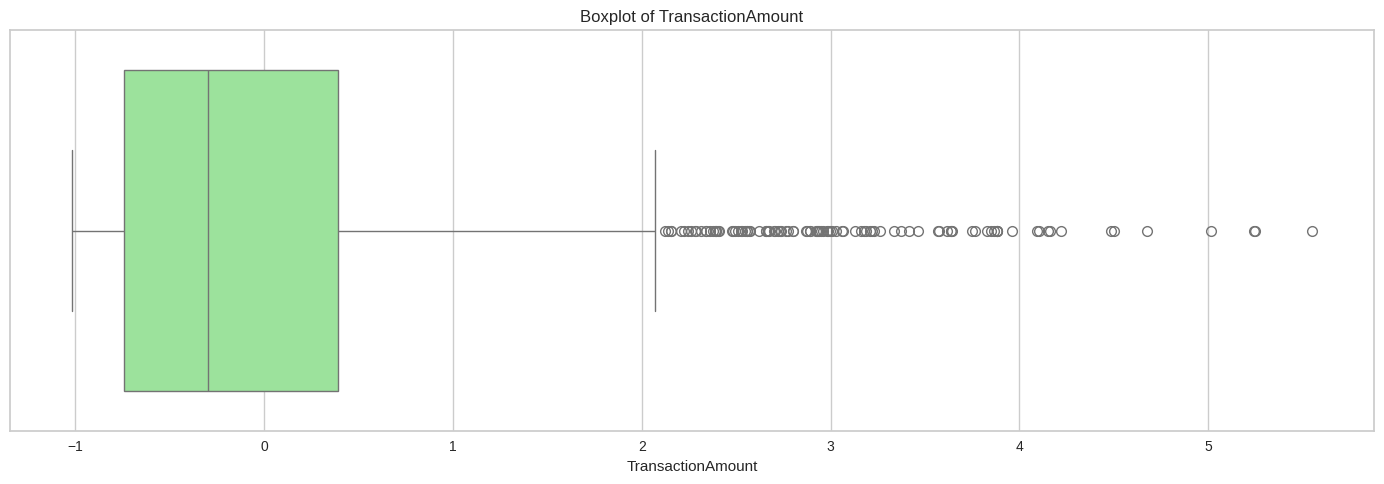

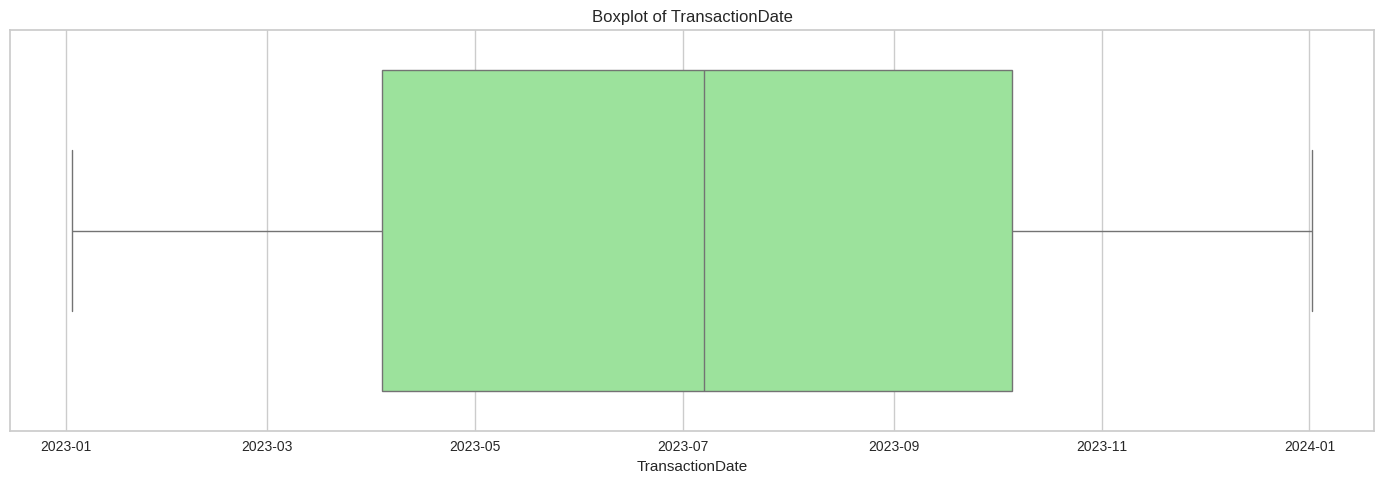

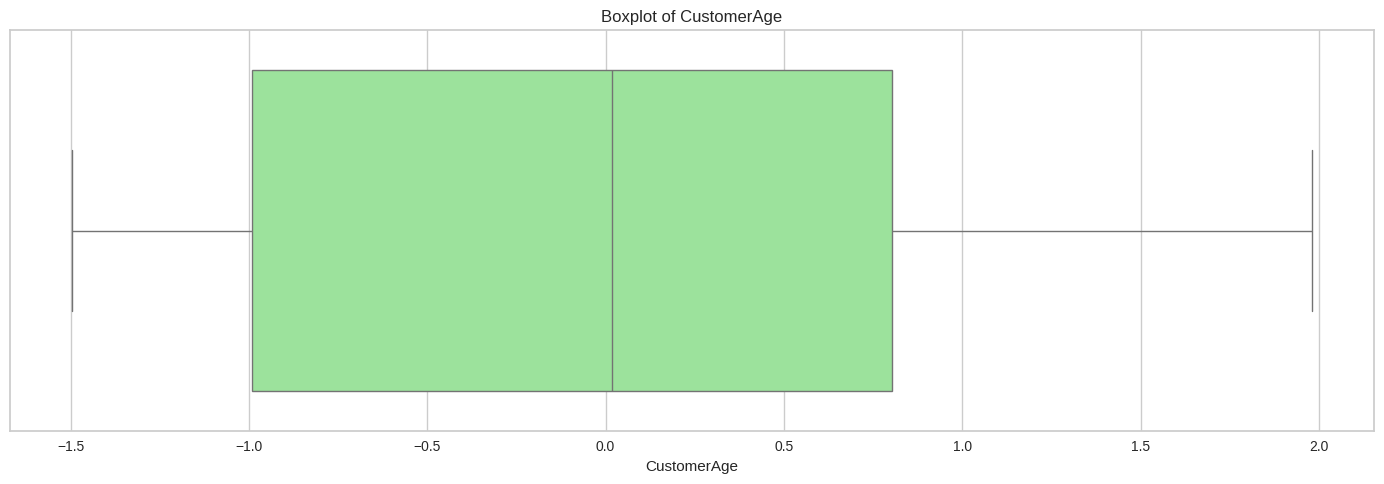

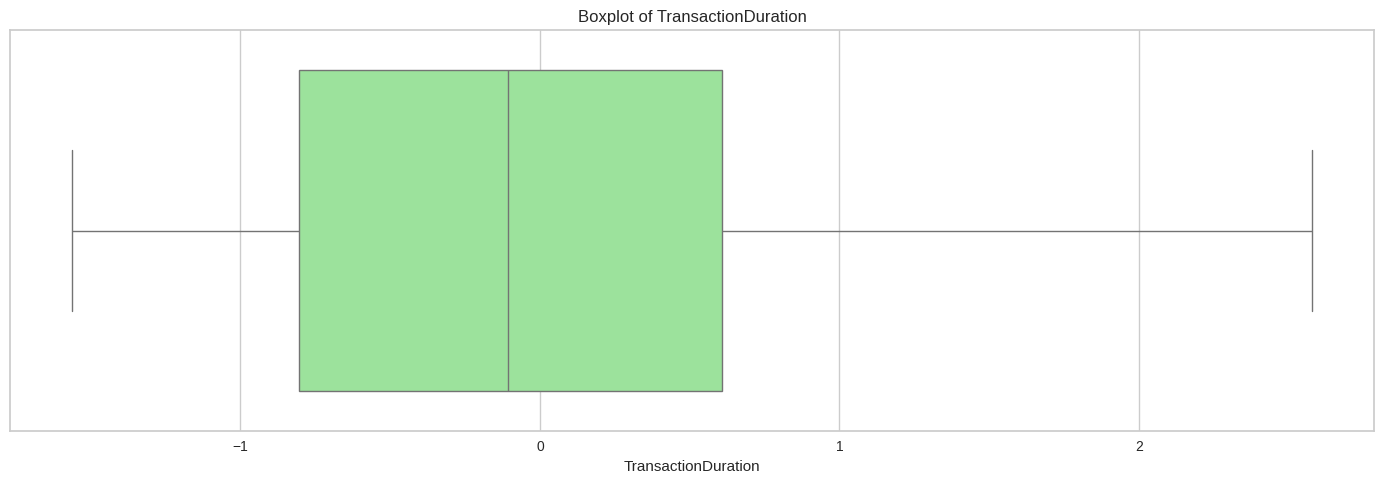

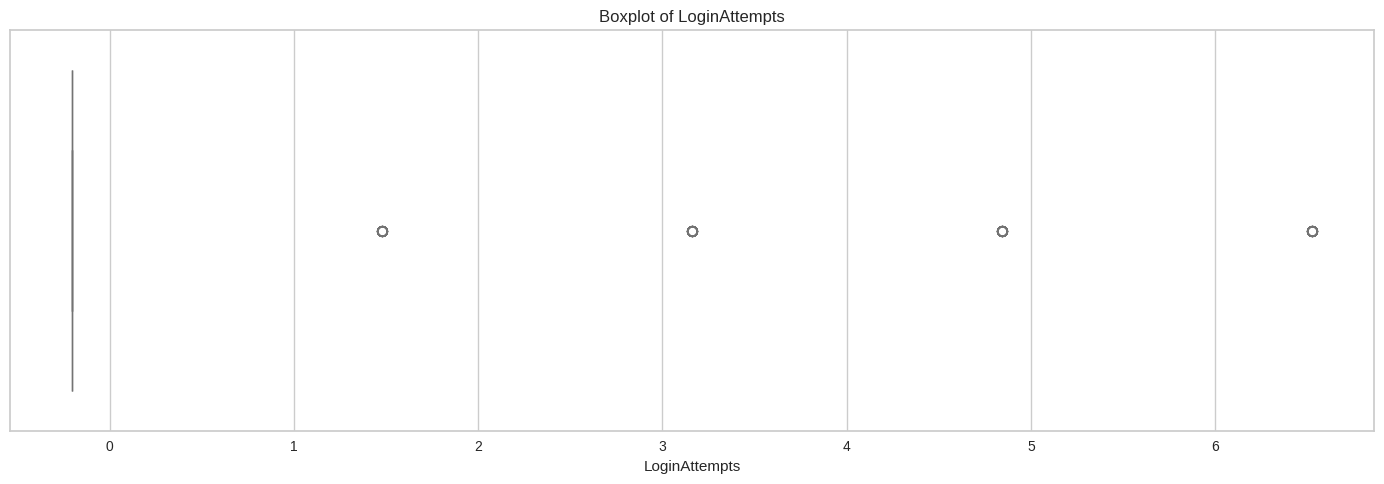

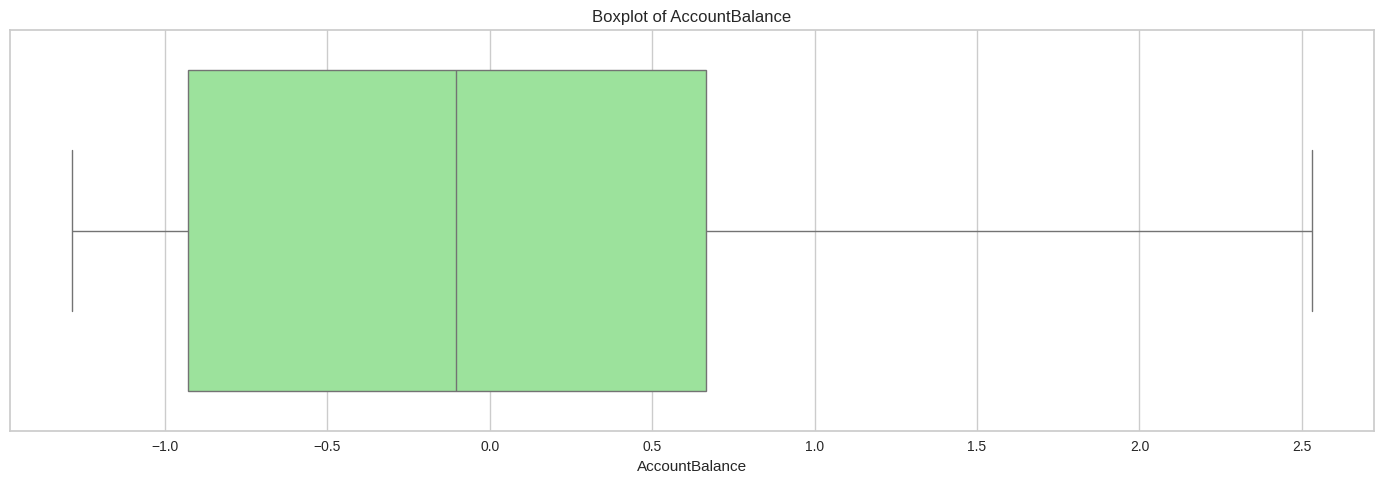

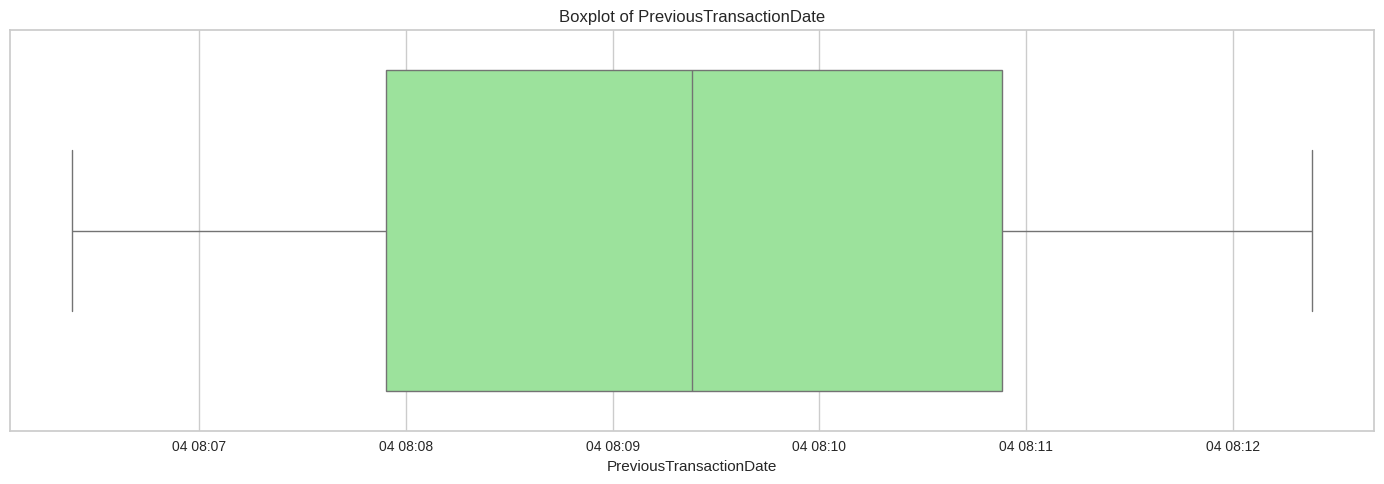

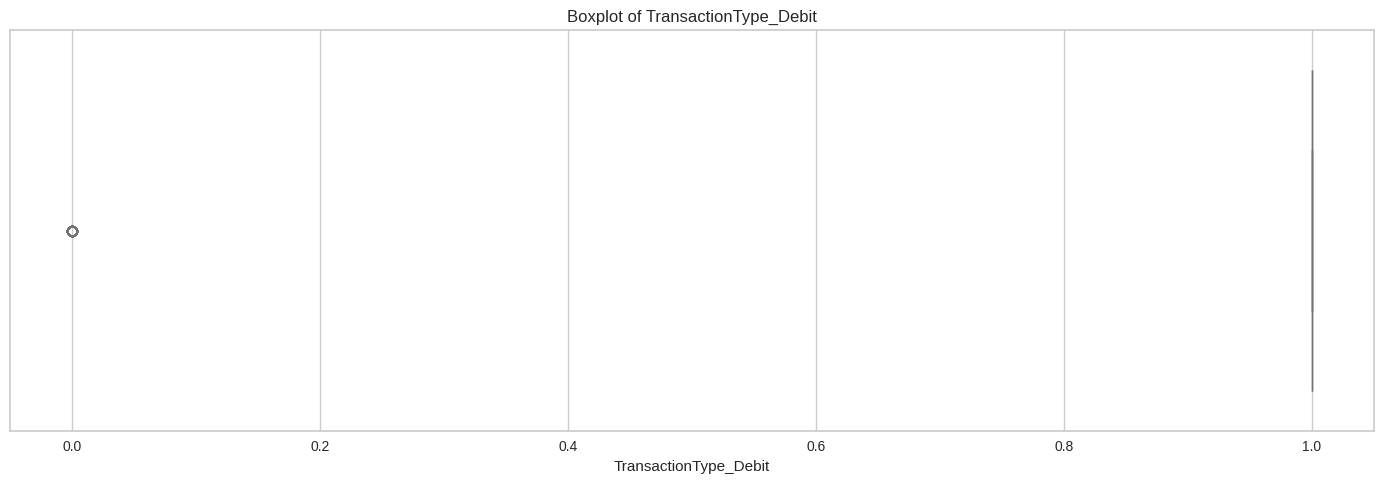

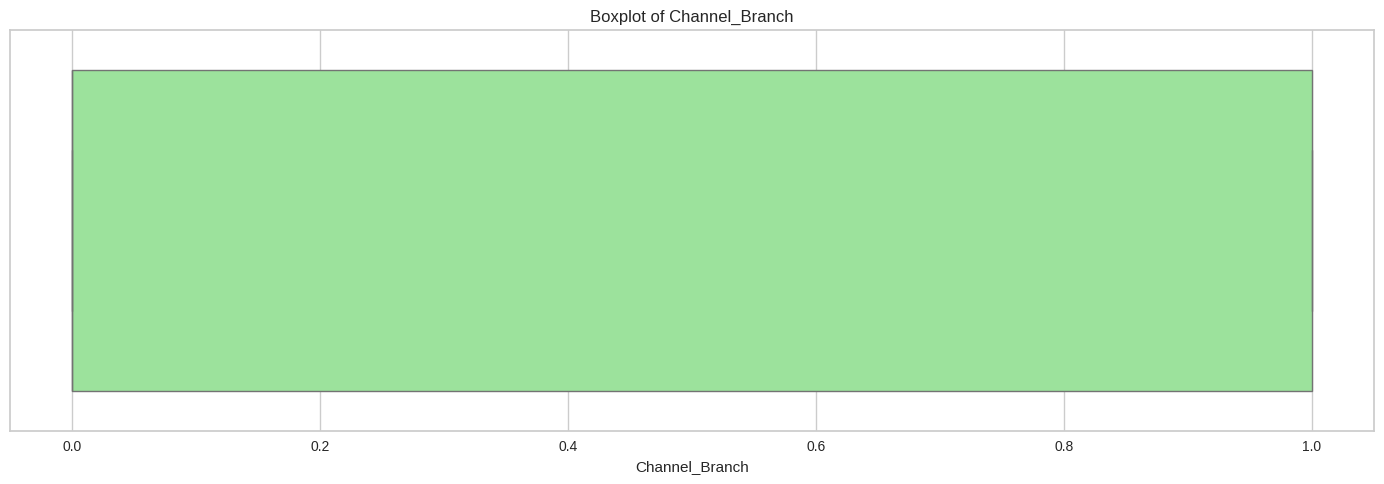

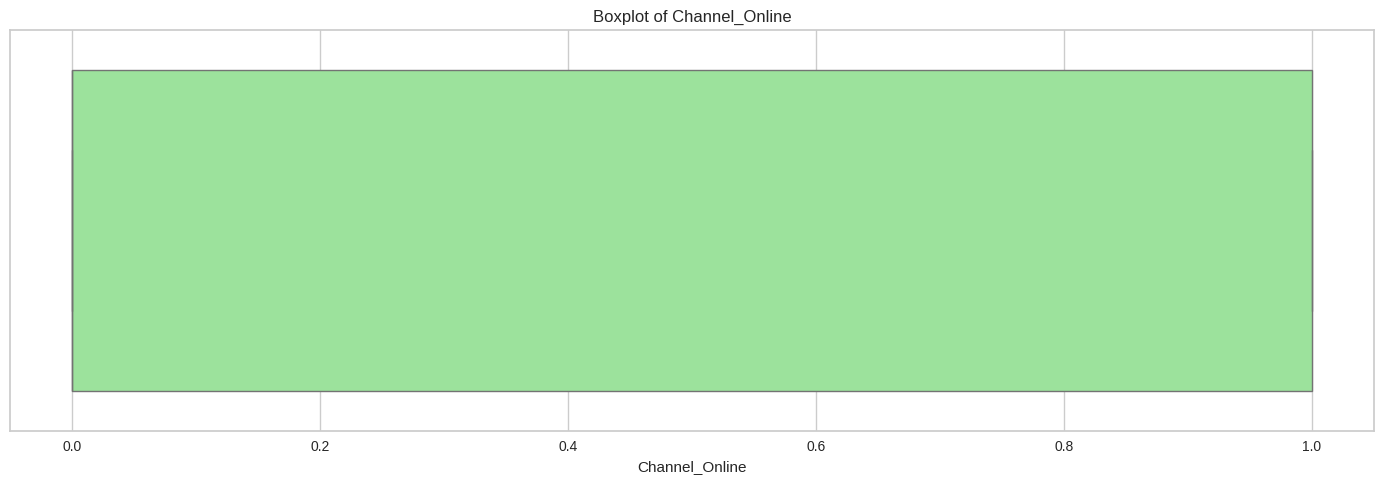

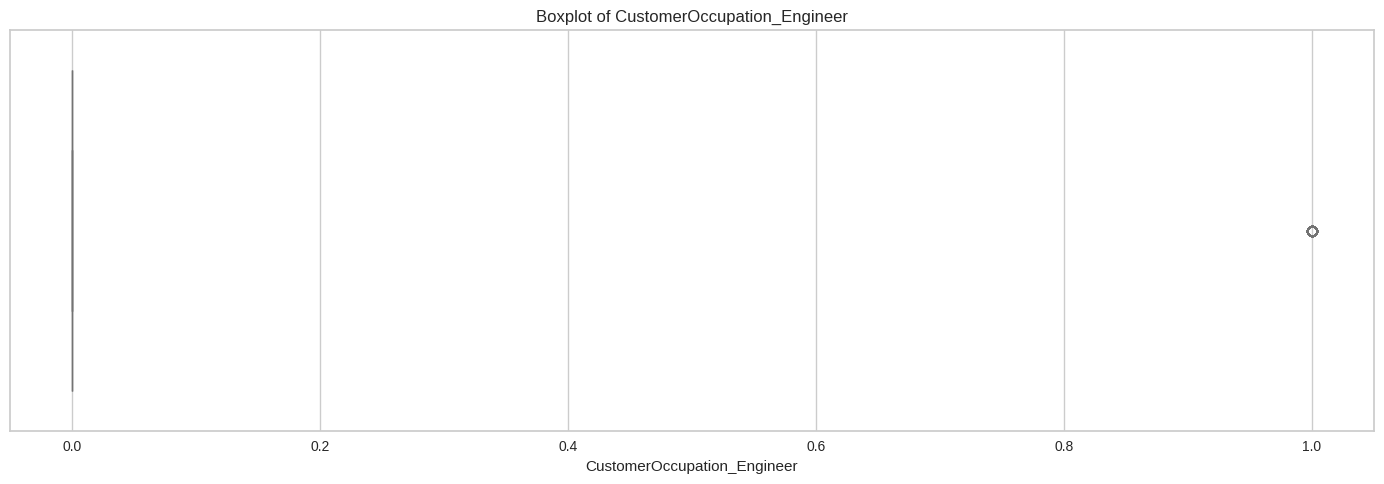

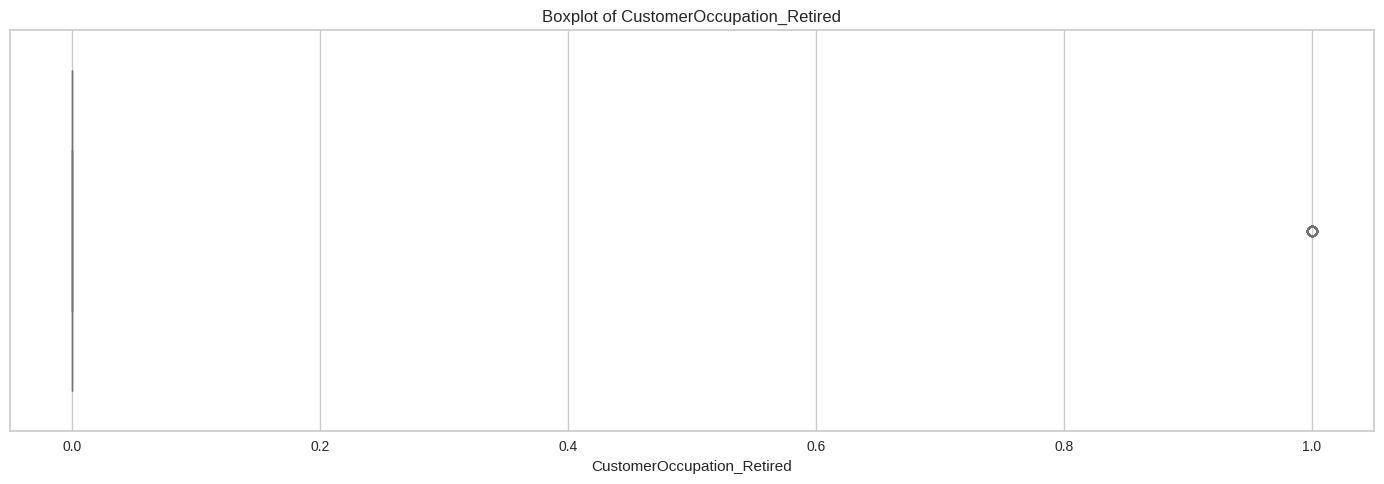

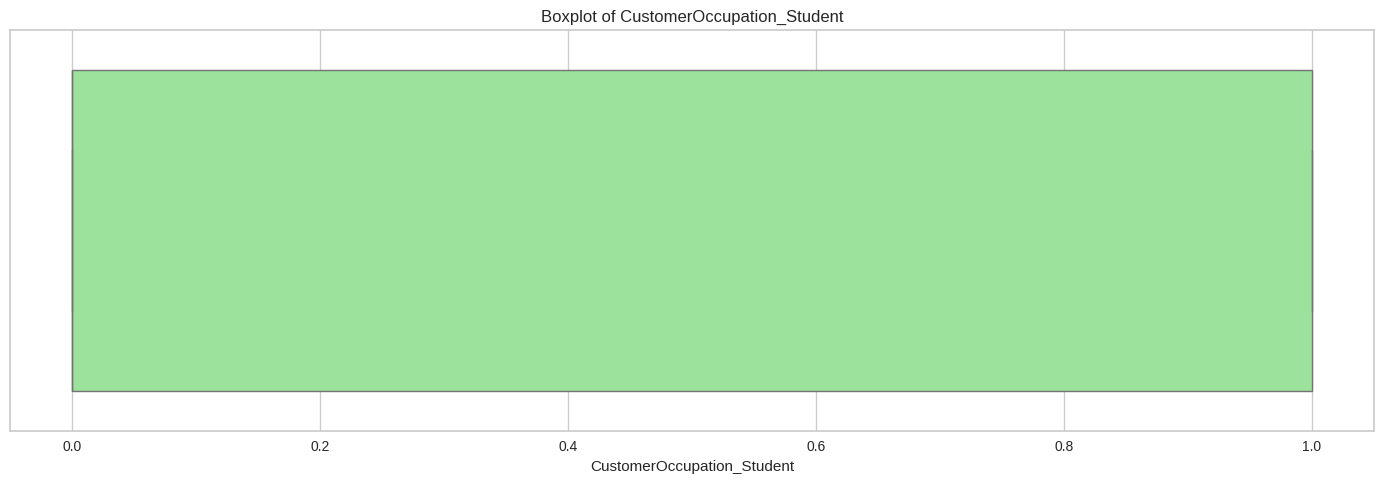

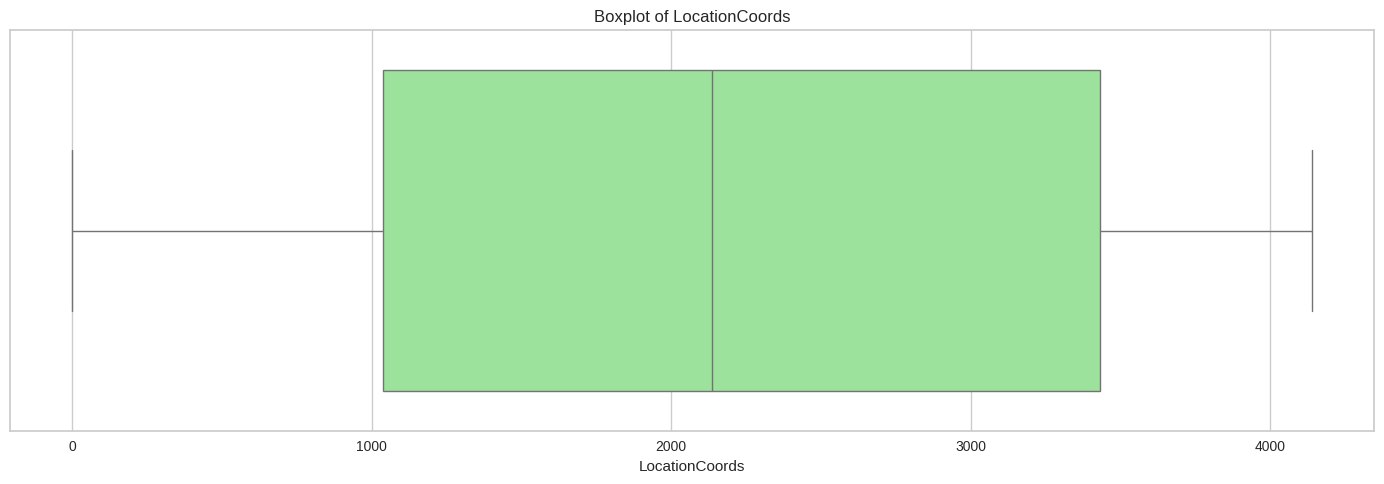

In [73]:
for col in df_encoded:
    plt.figure(figsize=(14, 5))

    # Boxplot
    sns.boxplot(x=df_encoded[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

Penjelasan:
- Jika dilihat, grafik sebaran data pada data termasuk cukup baik, hanya ada beberapa outlier yang teridentifikasi terutama pada 'TransactionAmount' dan 'LoginAttempts'

**Handilng Outlier**

In [74]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
num_col = df_encoded.select_dtypes(include=np.number).columns

Q1 = df_encoded[num_col].quantile(0.25)
Q3 = df_encoded[num_col].quantile(0.75)
IQR = Q3 - Q1
# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((df_encoded[num_col] < (Q1 - 1.5 * IQR)) | (df_encoded[num_col] > (Q3 + 1.5 * IQR))).any(axis=1)
df_encoded = df_encoded.loc[condition, df_encoded.columns]

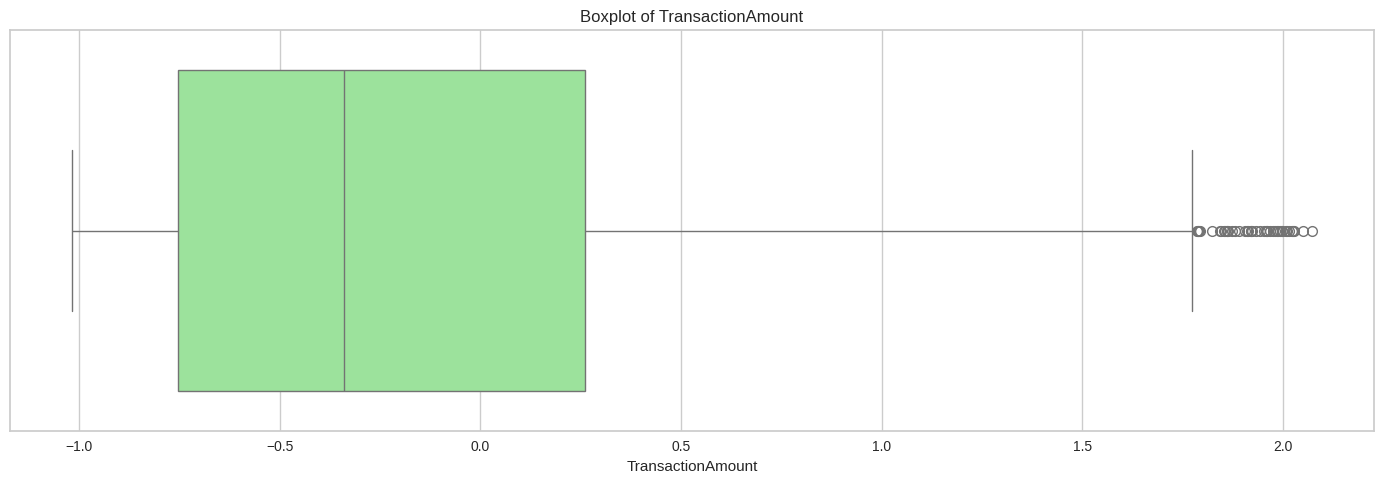

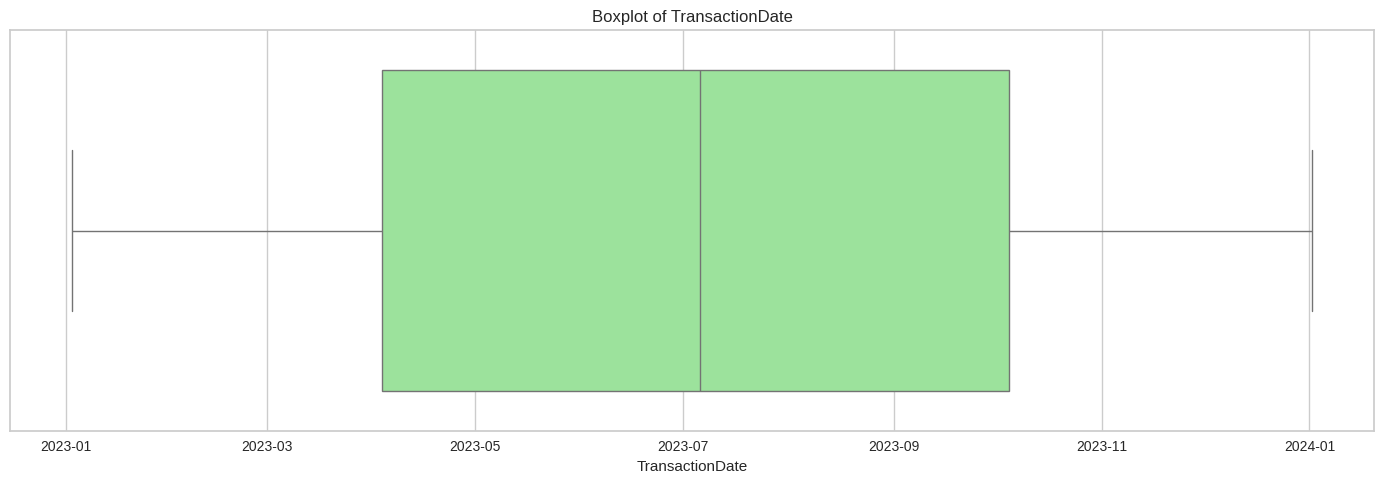

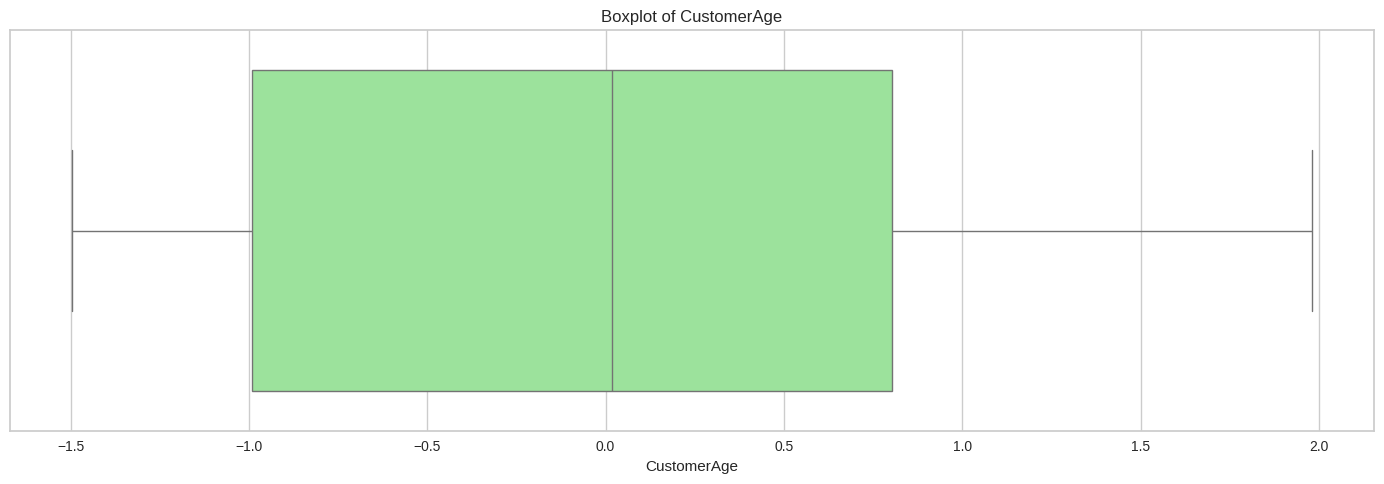

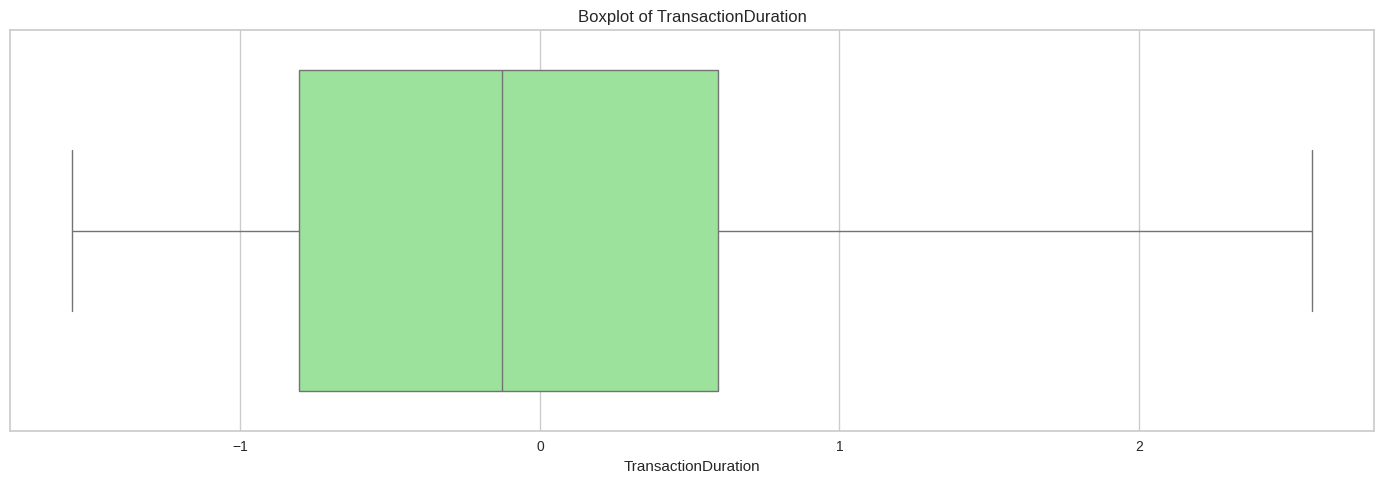

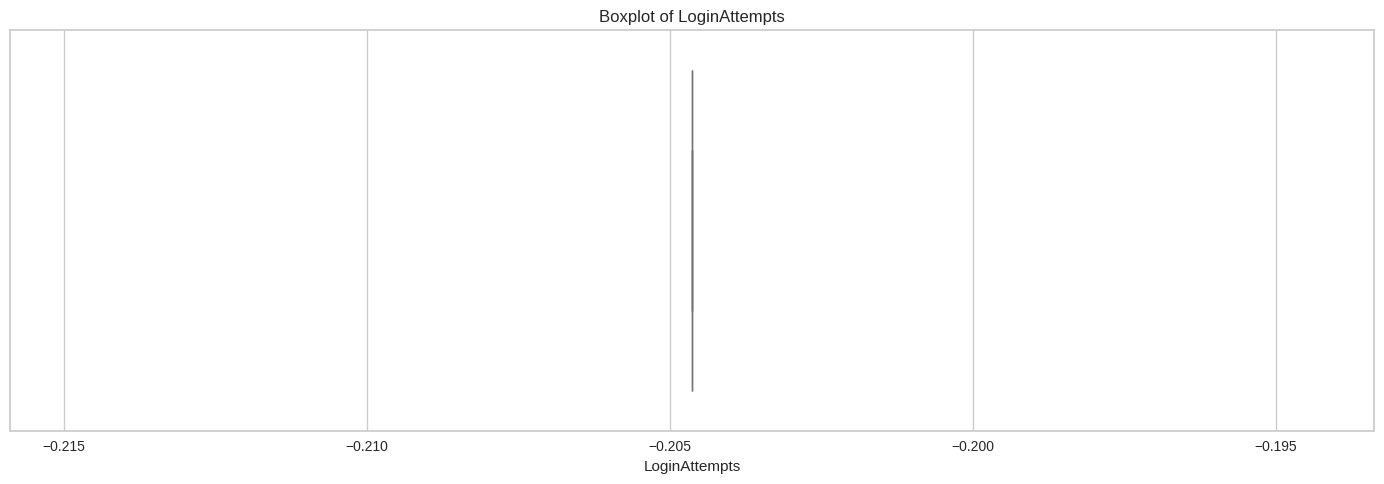

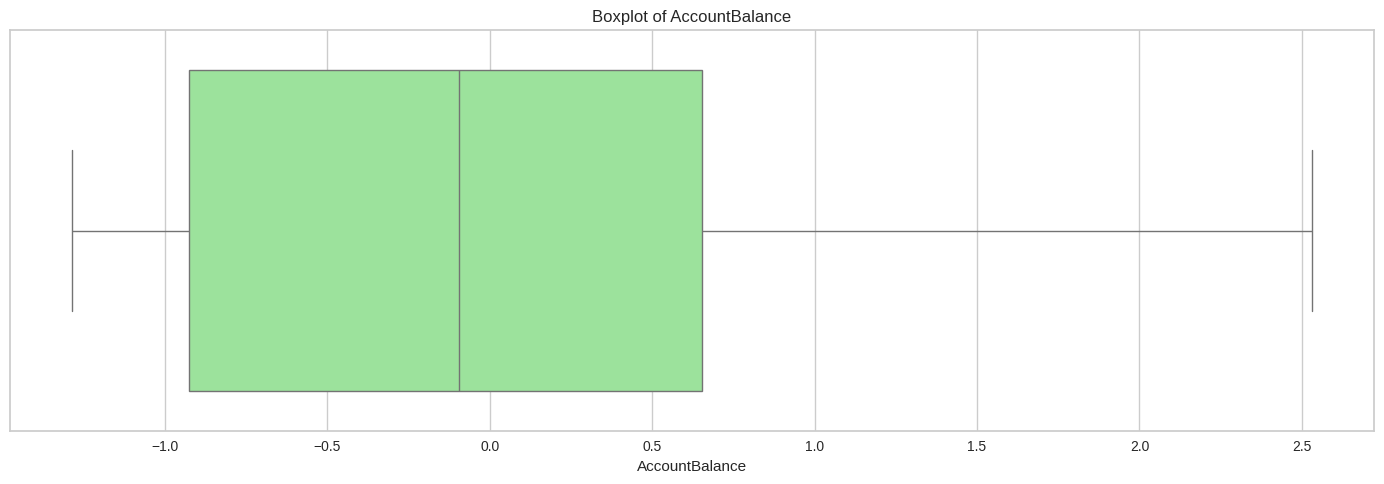

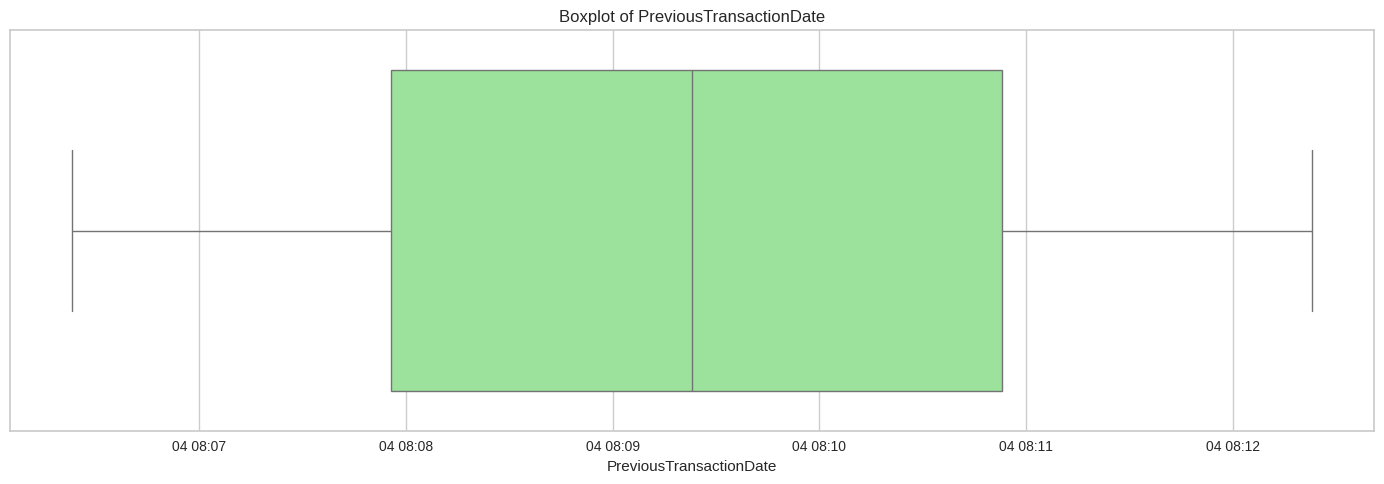

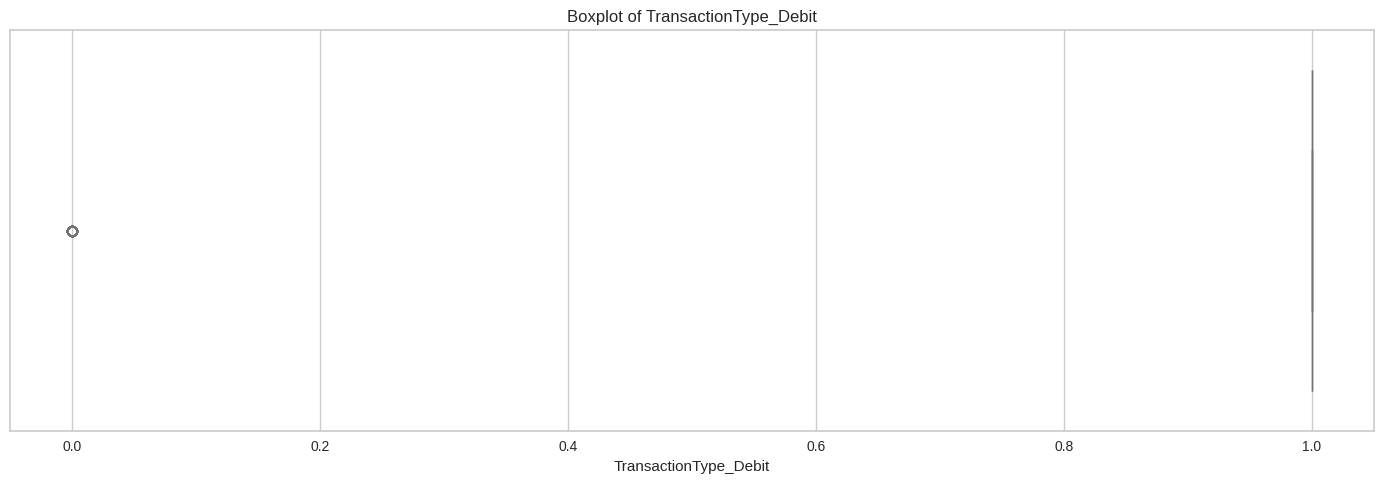

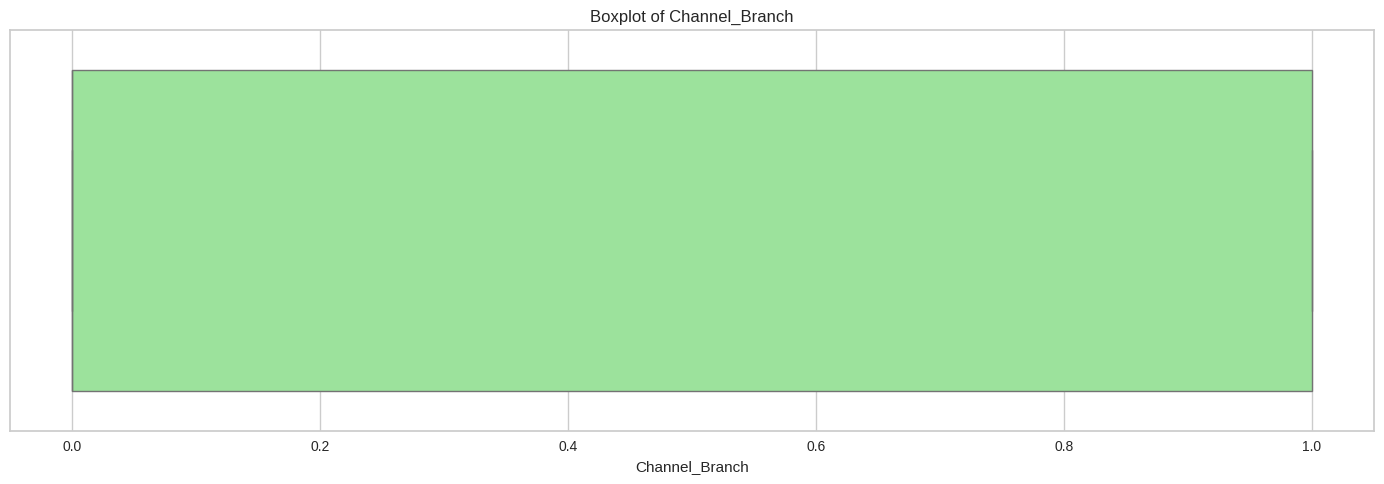

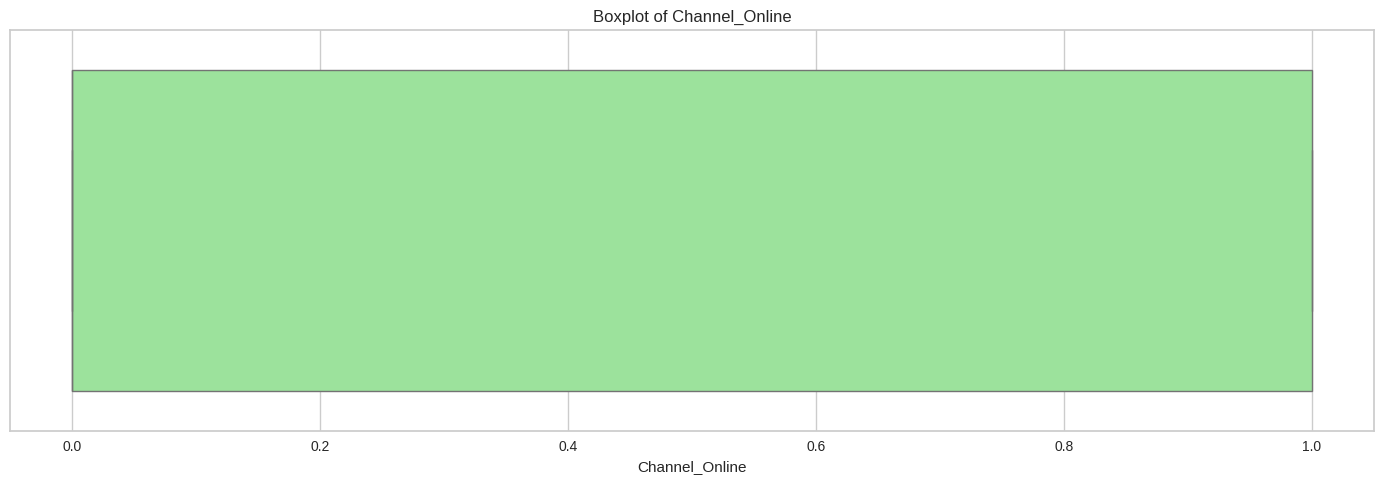

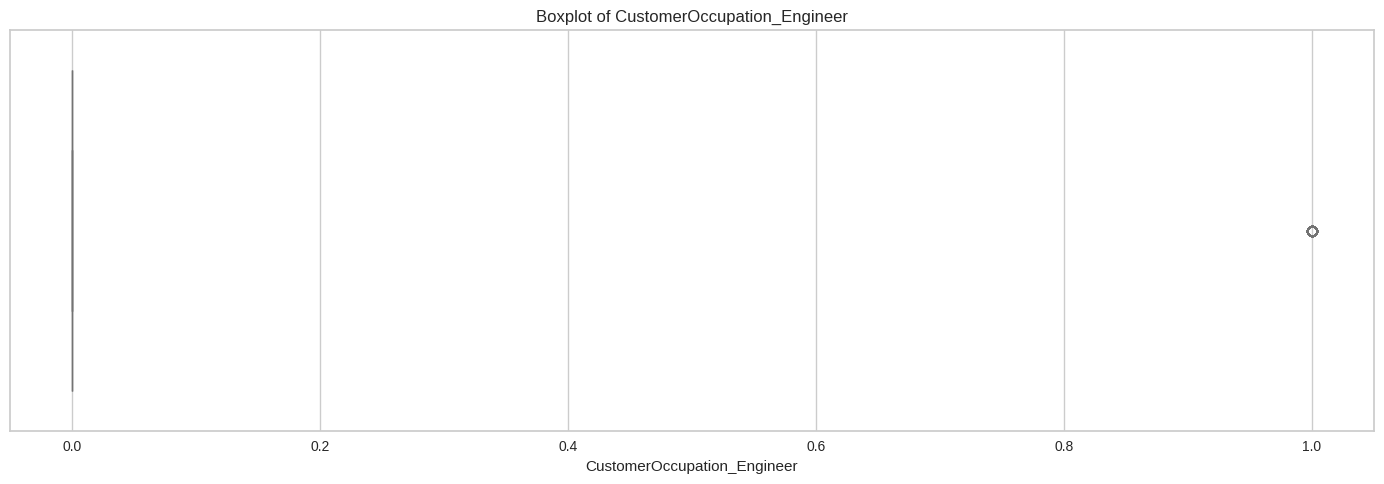

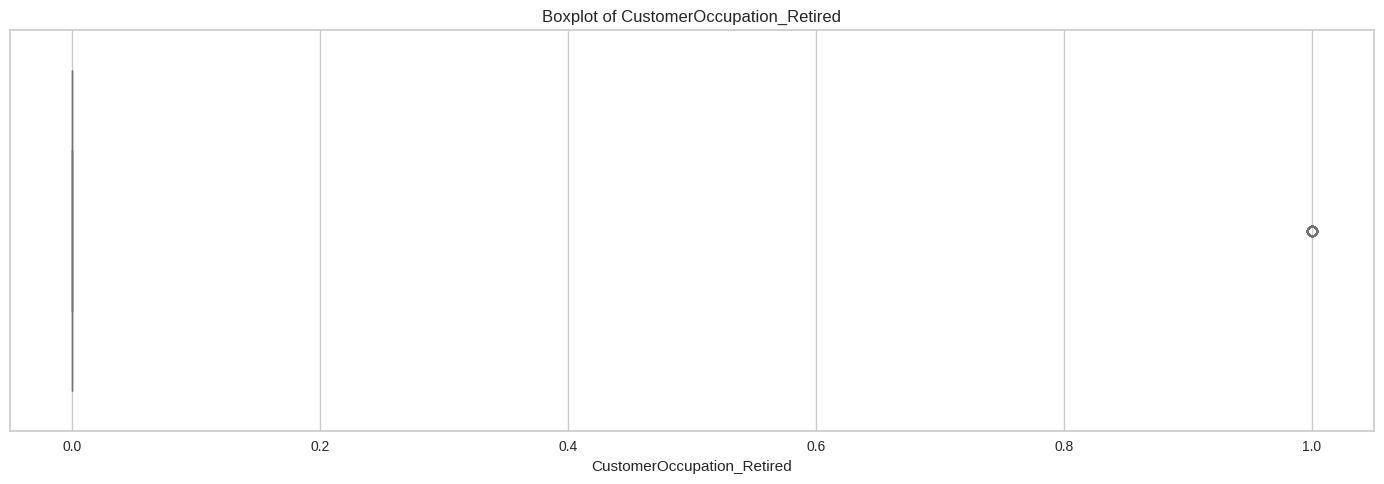

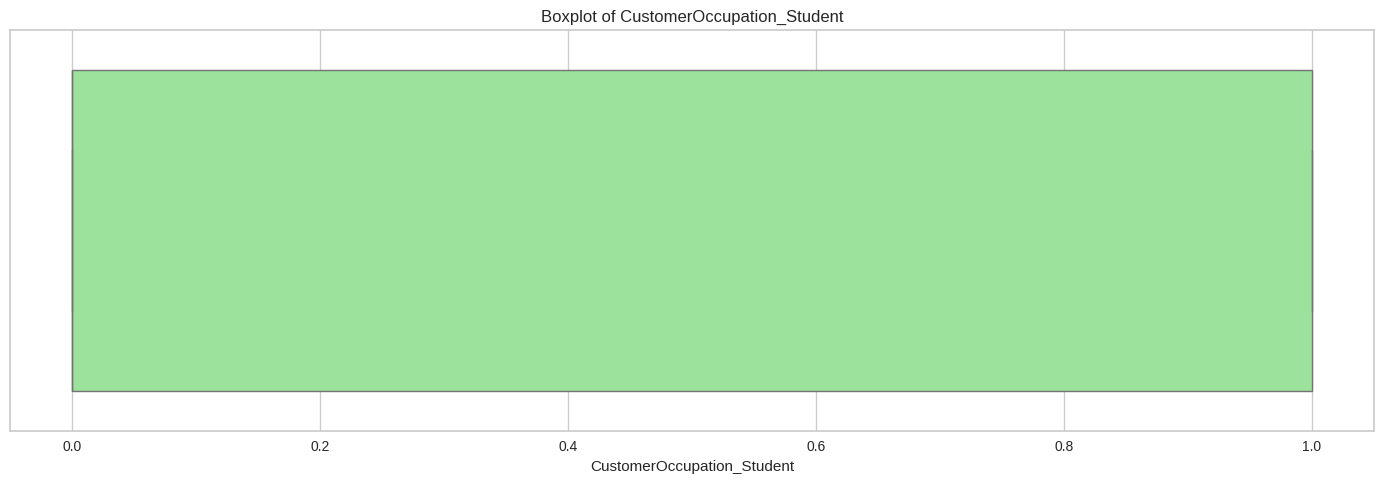

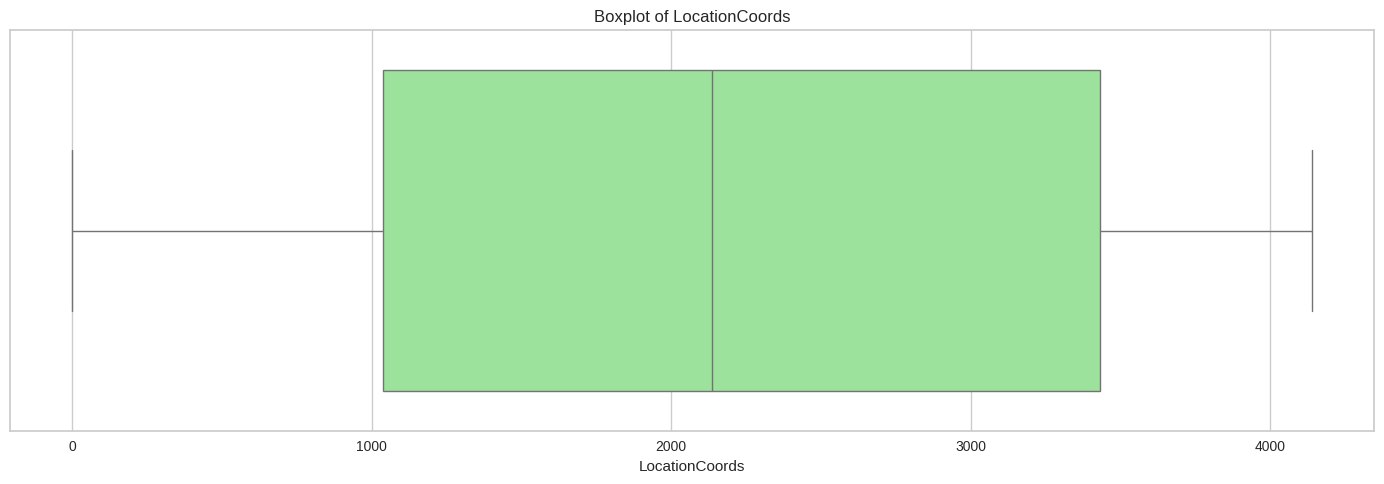

In [75]:
for col in df_encoded:
    plt.figure(figsize=(14, 5))

    # Boxplot
    sns.boxplot(x=df_encoded[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

Penjelasan:
- Nah, sekarang lebih terlihat rapi untuk sebaran data pada setiap kolomnya

**Binning**

In [76]:
df_scaled = df_encoded.copy()

# ----------------------------
# Binning pada CustomerAge
# ----------------------------
bins_age = [0, 25, 40, 60, 100]
labels_age = ['Youth', 'Adult', 'Middle-Age', 'Senior']
df_encoded['AgeGroup'] = pd.cut(df['CustomerAge'], bins=bins_age, labels=labels_age)

# ----------------------------
# Binning pada TransactionAmount
# ----------------------------
bins_amount = [0, 100, 500, 1000, df['TransactionAmount'].max()]
labels_amount = ['Low', 'Medium', 'High', 'Very High']
df_encoded['AmountGroup'] = pd.cut(df['TransactionAmount'], bins=bins_amount, labels=labels_amount)

# ----------------------------
# Encoding menggunakan get_dummies
# ----------------------------
df_dummies = pd.get_dummies(df_encoded[['AgeGroup', 'AmountGroup']], drop_first=True)

# Gabungkan ke dataframe utama jika diinginkan
df_encoded = pd.concat([df_encoded, df_dummies], axis=1)

df_encoded['Month'] = df_encoded['TransactionDate'].dt.month
drop_col = ['AgeGroup', 'AmountGroup', 'TransactionDate', 'PreviousTransactionDate']
df_encoded = df_encoded.drop(columns=drop_col)

# Tampilkan hasil akhir
df_encoded.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Debit,Channel_Branch,Channel_Online,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,LocationCoords,AgeGroup_Adult,AgeGroup_Middle-Age,AgeGroup_Senior,AmountGroup_Medium,AmountGroup_High,AmountGroup_Very High,Month
0,-0.970546,1.419862,-0.548393,-0.204629,-0.000315,True,False,False,False,False,False,3915.340577,False,False,True,False,False,False,4
1,0.268963,1.307715,0.307960,-0.204629,2.218381,True,False,False,False,False,False,2283.538695,False,False,True,True,False,False,6
2,-0.586526,-1.439874,-0.905207,-0.204629,-1.024091,True,False,True,False,False,True,3431.992748,False,False,False,True,False,False,7
3,-0.387294,-1.047361,-1.347656,-0.204629,0.886694,True,False,True,False,False,True,681.143085,True,False,False,True,False,False,5
5,-0.703375,-1.495947,0.750409,-0.204629,-1.111505,True,False,False,False,False,True,2135.713474,False,False,False,False,False,False,4


Penjelasan:
- Binning saya lakukan pada 2 kolom yaitu kolom 'CustomerAge' dan 'TransactionAmount', karena hanya 2 kolom inilah yang memungkinkan untuk memberikan informasi lebih jika dilakukan proses binning
- disini saya membaginya menjadi 4 kategori pada tiap kolomnya agar lebih merata kategorinya
- disini juga saya mengubah data tanggal pada kolom 'TransactionDate' menjadi data bulannya saja agar lebih mempermudah model
- setelah proses binning selesai dilakukan, kolom asli dan kolom pelabelannya saya hapus

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
2. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
3. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [77]:
df_encoded.head(10)

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Debit,Channel_Branch,Channel_Online,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,LocationCoords,AgeGroup_Adult,AgeGroup_Middle-Age,AgeGroup_Senior,AmountGroup_Medium,AmountGroup_High,AmountGroup_Very High,Month
0,-0.970546,1.419862,-0.548393,-0.204629,-0.000315,True,False,False,False,False,False,3915.340577,False,False,True,False,False,False,4
1,0.268963,1.307715,0.307960,-0.204629,2.218381,True,False,False,False,False,False,2283.538695,False,False,True,True,False,False,6
2,-0.586526,-1.439874,-0.905207,-0.204629,-1.024091,True,False,True,False,False,True,3431.992748,False,False,False,True,False,False,7
3,-0.387294,-1.047361,-1.347656,-0.204629,0.886694,True,False,True,False,False,True,681.143085,True,False,False,True,False,False,5
5,-0.703375,-1.495947,0.750409,-0.204629,-1.111505,True,False,False,False,False,True,2135.713474,False,False,False,False,False,False,4
6,-0.994538,-0.430555,0.279415,-0.204629,2.104915,False,False,False,False,False,False,3875.612975,True,False,False,False,False,False,2
7,-0.432062,1.251642,2.448842,-0.204629,-0.594580,False,True,False,False,True,False,1038.523700,False,False,True,True,False,False,5
8,-0.655184,0.354470,-0.477031,-0.204629,1.021683,False,True,False,True,False,False,775.234504,False,True,False,True,False,False,3
9,1.773966,0.578763,0.008236,-0.204629,-1.049871,True,False,False,False,False,False,1222.848140,False,True,False,False,True,False,3
10,-0.957916,0.410543,-0.862390,-0.204629,0.637915,False,False,True,True,False,False,2920.564136,False,True,False,False,False,False,3


In [78]:
df_encoded.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,LocationCoords,Month
count,2108.000000,2108.000000,2108.000000,2.108000e+03,2108.000000,2108.000000,2108.000000
mean,-0.146600,0.002177,-0.006016,-2.046294e-01,0.003150,2109.616487,6.536528
std,0.743533,0.996348,1.004664,7.939978e-15,1.000035,1305.356360,3.469864
min,-1.017881,-1.495947,-1.561745,-2.046294e-01,-1.285856,0.000000,1.000000
25%,-0.753302,-0.991288,-0.805299,-2.046294e-01,-0.925930,1038.523700,3.000000
50%,-0.340010,0.018031,-0.127353,-2.046294e-01,-0.093737,2135.713474,7.000000
75%,0.260056,0.803056,0.593411,-2.046294e-01,0.654517,3431.992748,10.000000
max,2.072523,1.980594,2.577295,-2.046294e-01,2.531190,4139.145472,12.000000


Penjelasan:
- dari detail diatas, dataset sudah siap untuk dilakukan proses clustering

In [79]:
num_col = df_encoded.select_dtypes(include=np.number).columns

Q1 = df_encoded[num_col].quantile(0.25)
Q3 = df_encoded[num_col].quantile(0.75)
IQR = Q3 - Q1
# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((df_encoded[num_col] < (Q1 - 1.5 * IQR)) | (df_encoded[num_col] > (Q3 + 1.5 * IQR))).any(axis=1)
df_encoded = df_encoded.loc[condition, df_encoded.columns]

Penjelasan:
- Disini saya melakukan outliers handling lagi karena tadi ada beberapa perubahan data

**Elbow Method**

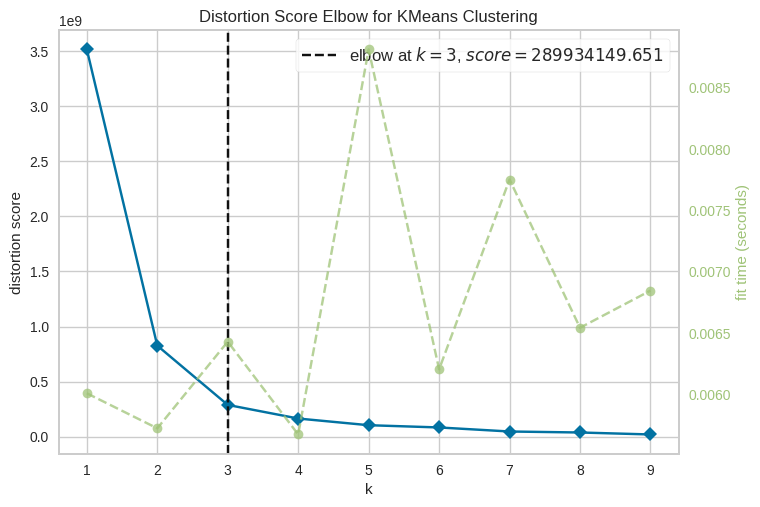

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [80]:
X_cluster = df_encoded.copy()
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X_cluster)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

Penjelasan:
- Melakukan Elbow Method untuk menentukan jumlah cluster yang optimal dan pada hasil elbow method, cluster yang optimal adalah 3

**Train Model**

In [81]:
kmeans = KMeans(n_clusters=3, random_state=42)

# 4. Latih model KMeans
df_encoded['Target'] = kmeans.fit_predict(X_cluster)

Penjelasan:
- Melakukan training model dan memasukkan hasil clusternya kedalam dataset dengan kolom bernama 'Target'(sesuai dengan permintaan pada langkah 'Mengeksport Data'

Jalankan cell code ini untuk menyimpan model kamu.

**Menyimpan Model**

In [82]:
joblib.dump(X_cluster, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Menghitung dan Menampilkan Nilai Silhouette Score**

In [83]:
silhouette_avg = silhouette_score(X_cluster, df_encoded['Target'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.670000923683912


**Visualisasi Hasil Clustering**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/tmp/ipython-input-84-4049793904.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


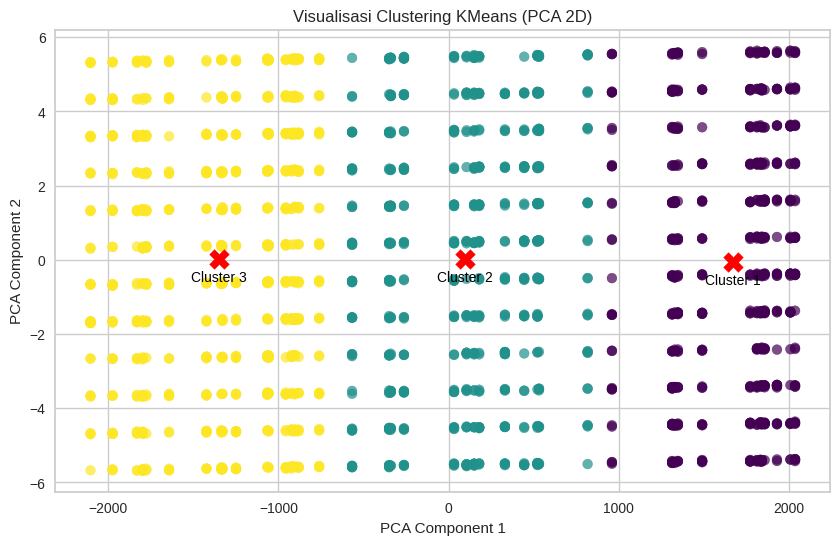

In [84]:
labels = kmeans.fit_predict(X_cluster)

# Reduksi dimensi untuk visualisasi
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_cluster)

# Plot hasil cluster
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)

# Plot centroids
centroids_2d = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='red', s=200, marker='X')

for i, (x, y) in enumerate(centroids_2d):
    plt.text(x, y - 0.3, f'Cluster {i+1}', ha='center', va='top', fontsize=10, color='black')

# Tambahan plot
plt.title('Visualisasi Clustering KMeans (PCA 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

Penjelasan:
- Data dapat dipisah dengan cukup jelas menjadi tiga kelompok yaitu warna ungu (Cluster 1) dan warna biru(Cluster 2), dan warna kuning(Cluster 3)

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

**PCA**

In [85]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_cluster)

labels = kmeans.fit_predict(X_pca)

score = silhouette_score(X_pca, labels)
print(f"Silhouette Score setelah PCA: {score:.4f}")

Silhouette Score setelah PCA: 0.6704


Penjelasan:
- setelah dilakukan PCA, skor silhouette naik tetapi tidak terlalu banyak, hanya sekitar 0.004 saja

**Menyimpan Model PCA**

In [86]:
joblib.dump(X_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


**Data Splitting**

In [87]:
X = df_encoded.iloc[:, [0, 2]].values

print(pd.DataFrame(X, columns=['TransactionAmount', 'CustomerAge']))

      TransactionAmount  CustomerAge
0             -0.970546    -0.548393
1              0.268963     0.307960
2             -0.586526    -0.905207
3             -0.387294    -1.347656
4             -0.703375     0.750409
...                 ...          ...
2059          -0.382263    -1.433292
2060          -0.186796    -0.377123
2061          -0.977083    -0.605484
2062          -0.224308    -0.976570
2063          -0.338966    -0.505576

[2064 rows x 2 columns]


Penjelasan:
- Melakukan data splitting pada kolom yang dijadikan sebagai target untuk menganalisis karateristik setiap cluster

**Analisis Deskriptif untuk Nilai Numerik**

In [88]:
labels = kmeans.labels_

k = 3
kmeans.fit(X)

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]

        # Menghitung statistik
        mean_transaction = cluster_data[:, 0].mean()
        min_transaction = cluster_data[:, 0].min()
        max_transaction = cluster_data[:, 0].max()

        mean_age = cluster_data[:, 1].mean()
        min_age = cluster_data[:, 1].min()
        max_age = cluster_data[:, 1].max()

        # Menampilkan hasil
        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata TransactionAmount: {mean_transaction:.2f}")
        print(f"Rata-rata CustomerAge: {mean_age:.2f}")
        print(f"Minimum TransactionAmount: {min_transaction:.2f}")
        print(f"Minimum CustomerAge: {min_age:.2f}")
        print(f"Maksimum TransactionAmount: {max_transaction:.2f}")
        print(f"Maksimum CustomerAge: {max_age:.2f}")

analyze_clusters(X, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata TransactionAmount: -0.21
Rata-rata CustomerAge: -0.01
Minimum TransactionAmount: -1.01
Minimum CustomerAge: -1.56
Maksimum TransactionAmount: 1.74
Maksimum CustomerAge: 2.56

Cluster 2:
Rata-rata TransactionAmount: -0.18
Rata-rata CustomerAge: 0.01
Minimum TransactionAmount: -1.02
Minimum CustomerAge: -1.56
Maksimum TransactionAmount: 1.73
Maksimum CustomerAge: 2.56

Cluster 3:
Rata-rata TransactionAmount: -0.19
Rata-rata CustomerAge: -0.03
Minimum TransactionAmount: -1.02
Minimum CustomerAge: -1.56
Maksimum TransactionAmount: 1.77
Maksimum CustomerAge: 2.58


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
- **Cluster 1: (Pelanggan Umum dengan Aktivitas Transaksi Beragam)**
 - **Rata-rata TransactionAmount: -0.21**
 - **Rata-rata CustomerAge: -0.01**
 - **Rentang TransactionAmount: -1.01(Min) hingga 1.74(Max)**
 - **Rentang TransactionAmount: -1.56(Min) hingga 2.56(Max)**
 - **Analisis**: Cluster ini berisi pelanggan dari berbagai rentang usia (mulai dari sangat muda hingga sangat tua, terlihat dari rentang -1.56 hingga 2.56). Rata-rata usia pelanggan mendekati nol, menunjukkan distribusi usia yang relatif merata. Nilai transaksi juga bervariasi, dengan rata-rata sedikit di bawah nol. Kelompok ini mencerminkan pelanggan umum dengan perilaku transaksi yang bervariasi

- **Cluster 2: (Pelanggan Dewasa Aktif dengan Transaksi Menengah)**
 - **Rata-rata TransactionAmount: -0.18**
 - **Rata-rata CustomerAge: 0.01**
 - **Rentang TransactionAmount: -1.02(Min) hingga 1.73(Max)**
 - **Rentang TransactionAmount: -1.56(Min) hingga 2.56(Max)**
 - **Analisis**: Seperti pada Cluster 1, cluster ini juga mencakup usia pelanggan yang luas. Namun, karena rata-rata usia sedikit positif, bisa diasumsikan lebih condong ke pelanggan dewasa. Nilai transaksi masih berada sedikit di bawah rata-rata. Cluster ini bisa terdiri dari pengguna aktif yang berusia produktif dan cenderung melakukan transaksi dengan nilai sedang.

- **Cluster 3: (Pelanggan Muda dengan Nilai Transaksi Stabil)**
 - **Rata-rata TransactionAmount: -0.19**
 - **Rata-rata CustomerAge: -0.03**
 - **Rentang TransactionAmount: -1.02(Min) hingga 1.77(Max)**
 - **Rentang TransactionAmount: -1.56(Min) hingga 2.58(Max)**
 - **Analisis**: Kelompok ini sedikit lebih condong ke pelanggan muda karena rata-rata usia negatif. Nilai transaksi memiliki rata-rata sedikit di bawah 0, dengan sebaran yang cukup besar (dari -1.02 hingga 1.77). Meski nilai transaksi tidak terlalu tinggi, kelompok ini mungkin mencakup pelanggan baru atau pelajar/mahasiswa yang sedang mulai aktif bertransaksi

**Analisis Deskriptif untuk Nilai Kategorikal**

In [89]:
df_encoded.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Debit,Channel_Branch,Channel_Online,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,LocationCoords,AgeGroup_Adult,AgeGroup_Middle-Age,AgeGroup_Senior,AmountGroup_Medium,AmountGroup_High,AmountGroup_Very High,Month,Target
0,-0.970546,1.419862,-0.548393,-0.204629,-0.000315,True,False,False,False,False,False,3915.340577,False,False,True,False,False,False,4,0
1,0.268963,1.307715,0.307960,-0.204629,2.218381,True,False,False,False,False,False,2283.538695,False,False,True,True,False,False,6,1
2,-0.586526,-1.439874,-0.905207,-0.204629,-1.024091,True,False,True,False,False,True,3431.992748,False,False,False,True,False,False,7,0
3,-0.387294,-1.047361,-1.347656,-0.204629,0.886694,True,False,True,False,False,True,681.143085,True,False,False,True,False,False,5,2
5,-0.703375,-1.495947,0.750409,-0.204629,-1.111505,True,False,False,False,False,True,2135.713474,False,False,False,False,False,False,4,1


In [90]:
def categorical_analysis(df, columns):
    category_stats = defaultdict(list)

    # Kumpulkan statistik per kategori
    for col in columns:
        try:
            mode_series = df[col].mode()
            if mode_series.empty:
                mode = None
                freq = 0
                percent = 0
            else:
                mode = mode_series[0]
                freq = (df[col] == mode).sum()
                percent = (freq / df.shape[0]) * 100

            true_count = df[col].sum() if df[col].dtype == 'bool' else None

            # Ambil prefix
            prefix = col.split('_')[0]
            category_stats[prefix].append({
                'column': col,
                'mode': mode,
                'freq': freq,
                'percent': percent,
                'true_count': true_count
            })
        except Exception as e:
            print(f"Kolom {col} dilewati karena error: {e}")
            continue

    # Tampilkan hasil per kategori
    for prefix, stats in category_stats.items():
        print(f"=== Kategori: {prefix} ===")
        top_true = None
        if any(stat['true_count'] is not None for stat in stats):
            top_true = max(stats, key=lambda x: x['true_count'] if x['true_count'] is not None else -1)

        for stat in stats:
            print(f"Kolom: {stat['column']}")
            print(f"  Modus: {stat['mode']}")
            print(f"  Frekuensi: {stat['freq']} dari {df.shape[0]} ({stat['percent']:.2f}%)")

        if top_true and top_true['true_count'] is not None:
            print(f"\n>> Kolom dengan jumlah TRUE terbanyak di kategori '{prefix}': {top_true['column']} ({top_true['true_count']} TRUE)")
        print()

categorical_cols = df_encoded.select_dtypes(include=['object', 'category', 'bool']).columns
categorical_analysis(df_encoded, categorical_cols)


=== Kategori: TransactionType ===
Kolom: TransactionType_Debit
  Modus: True
  Frekuensi: 1581 dari 2064 (76.60%)

>> Kolom dengan jumlah TRUE terbanyak di kategori 'TransactionType': TransactionType_Debit (1581 TRUE)

=== Kategori: Channel ===
Kolom: Channel_Branch
  Modus: False
  Frekuensi: 1344 dari 2064 (65.12%)
Kolom: Channel_Online
  Modus: False
  Frekuensi: 1423 dari 2064 (68.94%)

>> Kolom dengan jumlah TRUE terbanyak di kategori 'Channel': Channel_Branch (720 TRUE)

=== Kategori: CustomerOccupation ===
Kolom: CustomerOccupation_Engineer
  Modus: False
  Frekuensi: 1565 dari 2064 (75.82%)
Kolom: CustomerOccupation_Retired
  Modus: False
  Frekuensi: 1578 dari 2064 (76.45%)
Kolom: CustomerOccupation_Student
  Modus: False
  Frekuensi: 1530 dari 2064 (74.13%)

>> Kolom dengan jumlah TRUE terbanyak di kategori 'CustomerOccupation': CustomerOccupation_Student (534 TRUE)

=== Kategori: AgeGroup ===
Kolom: AgeGroup_Adult
  Modus: False
  Frekuensi: 1535 dari 2064 (74.37%)
Kolom: Ag

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [91]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2064 entries, 0 to 2535
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TransactionAmount            2064 non-null   float64
 1   CustomerAge                  2064 non-null   float64
 2   TransactionDuration          2064 non-null   float64
 3   LoginAttempts                2064 non-null   float64
 4   AccountBalance               2064 non-null   float64
 5   TransactionType_Debit        2064 non-null   bool   
 6   Channel_Branch               2064 non-null   bool   
 7   Channel_Online               2064 non-null   bool   
 8   CustomerOccupation_Engineer  2064 non-null   bool   
 9   CustomerOccupation_Retired   2064 non-null   bool   
 10  CustomerOccupation_Student   2064 non-null   bool   
 11  LocationCoords               2064 non-null   float64
 12  AgeGroup_Adult               2064 non-null   bool   
 13  AgeGroup_Middle-Age    

In [92]:
df_encoded.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Inverse Transform**

In [94]:
def inverse_one_hot(df, prefix_list):
    df_result = df.copy()
    for prefix in prefix_list:
        # Cari kolom-kolom yang terkait dengan prefix
        ohe_cols = [col for col in df.columns if col.startswith(prefix + '_')]
        if ohe_cols:
            # Ambil nama kategori dari kolom yang True (idxmax)
            df_result[prefix] = df[ohe_cols].idxmax(axis=1).str.replace(prefix + '_', '', regex=False)
            # Hapus kolom one-hot
            df_result.drop(columns=ohe_cols, inplace=True)
    return df_result

prefixes = ['TransactionType', 'Channel', 'CustomerOccupation', 'AgeGroup', 'AmountGroup']
df_original = inverse_one_hot(df_encoded, prefixes)

le = LabelEncoder()
for col in prefixes:
    df_original[col] = le.fit_transform(df_original[col])

df_original[numeric_columns] = scaler.inverse_transform(df_original[numeric_columns])

target_col = df_original.pop('Target')
df_original['Target'] = target_col

Penjelasan:
- Melakukan inverse transform pada kolom dengan hasil one-hot encoding lalu mengubahnya ke label encoding, dan juga melakukan inverse pada nilai yang sudah di standarisasi

In [95]:
df_original.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,LocationCoords,Month,TransactionType,Channel,CustomerOccupation,AgeGroup,AmountGroup,Target
0,14.09,70.0,81.0,1.0,5112.21,3915.340577,4,0,0,0,2,1,0
1,376.24,68.0,141.0,1.0,13758.91,2283.538695,6,0,0,0,2,1,1
2,126.29,19.0,56.0,1.0,1122.35,3431.992748,7,0,1,2,0,1,0
3,184.50,26.0,25.0,1.0,8569.06,681.143085,5,0,1,2,0,1,2
5,92.15,18.0,172.0,1.0,781.68,2135.713474,4,0,0,2,0,1,1


**Splitting Data Hasil Inverse**

In [96]:
X = df_original.iloc[:, [0, 1]]

print(pd.DataFrame(X, columns=['TransactionAmount', 'CustomerAge']))

      TransactionAmount  CustomerAge
0                 14.09         70.0
1                376.24         68.0
2                126.29         19.0
3                184.50         26.0
5                 92.15         18.0
...                 ...          ...
2510             185.97         23.0
2511             243.08         24.0
2523              12.18         76.0
2524             232.12         37.0
2535             198.62         27.0

[2064 rows x 2 columns]


Penjelasan:
- Melakukan data splitting pada kolom yang dijadikan sebagai target untuk menganalisis karateristik setiap cluster

In [97]:
labels = kmeans.labels_

k = 3

kmeans.fit(X)

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]

        # Menghitung statistik
        mean_transaction = cluster_data.iloc[:, 0].mean()
        min_transaction = cluster_data.iloc[:, 0].min()
        max_transaction = cluster_data.iloc[:, 0].max()

        mean_age = cluster_data.iloc[:, 1].mean()
        min_age = cluster_data.iloc[:, 1].min()
        max_age = cluster_data.iloc[:, 1].max()

        # Menampilkan hasil
        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata TransactionAmount: {mean_transaction:.2f}")
        print(f"Rata-rata CustomerAge: {mean_age:.2f}")
        print(f"Minimum TransactionAmount: {min_transaction:.2f}")
        print(f"Minimum CustomerAge: {min_age:.2f}")
        print(f"Maksimum TransactionAmount: {max_transaction:.2f}")
        print(f"Maksimum CustomerAge: {max_age:.2f}")

# Analisis karakteristik setiap cluster
analyze_clusters(X, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata TransactionAmount: 149.47
Rata-rata CustomerAge: 45.71
Minimum TransactionAmount: 0.84
Minimum CustomerAge: 18.00
Maksimum TransactionAmount: 466.64
Maksimum CustomerAge: 80.00

Cluster 2:
Rata-rata TransactionAmount: 176.41
Rata-rata CustomerAge: 43.91
Minimum TransactionAmount: 0.26
Minimum CustomerAge: 18.00
Maksimum TransactionAmount: 793.88
Maksimum CustomerAge: 80.00

Cluster 3:
Rata-rata TransactionAmount: 538.92
Rata-rata CustomerAge: 44.20
Minimum TransactionAmount: 283.45
Minimum CustomerAge: 18.00
Maksimum TransactionAmount: 815.96
Maksimum CustomerAge: 80.00


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (Pelanggan Umum dengan Aktivitas Transaksi Rendah)**:
  - **Rata-rata (mean) TransactionAmount:** -0.21  | 149.47
  - **Rata-rata (mean) CustomerAge:** -0.01  | 45.71
  - **Rentang Transaksi:** -1.01 hingga 1.74  |  0.84 – 466.64
  - **Rentang Usia:** -1.56 hingga 2.56  |  18 – 80  
  - **Analisis:** Dari nilai standarisasi, TransactionAmount dan CustomerAge cenderung mendekati rata-rata (sekitar 0), namun sedikit lebih rendah. Setelah dikembalikan ke nilai asli, terlihat bahwa pelanggan di cluster ini memang memiliki nilai transaksi yang paling rendah di antara semua cluster.
Meski CustomerAge terlihat mendekati rata-rata (baik dalam bentuk standar maupun asli), profil usia tidak menjadi pembeda utama di sini.
Kesimpulannya, pelanggan di cluster ini merupakan nasabah umum yang kurang aktif secara finansial. Cocok untuk strategi promosi peningkatan transaksi atau penawaran bundling.

2. **Cluster 2: (Pelanggan Umum dengan Aktivitas Transaksi Menengah)**:
 - **Rata-rata (mean) TransactionAmount:** -0.18  | 176.41
 - **Rata-rata (mean) CustomerAge:** 0.01  | 43.91
 - Rentang Transaksi: -1.02 hingga 1.73  |  0.26 – 793.88
 - Rentang Usia: -1.56 hingga 2.56  |  18 – 80
 - **Analisis:** Dalam bentuk standarisasi, nilai TransactionAmount sedikit lebih tinggi dari Cluster 1, tetapi masih di bawah rata-rata. Setelah inverse, ternyata nilai transaksinya menengah, berada di antara Cluster 1 dan 3.
CustomerAge hampir sama dengan cluster lain (sekitar usia 44 tahun).
Segmentasi ini menggambarkan pelanggan dengan aktivitas cukup aktif, walau belum termasuk pelanggan bernilai tinggi. Mereka cocok untuk program loyalitas, upselling, atau edukasi produk.

3. **Cluster 3: (Pelanggan Umum dengan Aktivitas Transaksi Tinggi)**:
 - **Rata-rata (mean) TransactionAmount:** -0.19  | 538.92
 - **Rata-rata (mean) CustomerAge:** -0.03  | 44.04
 - Rentang Transaksi: -1.02 hingga 1.77  |  283.45 – 815.96
 - Rentang Usia: -1.56 hingga 2.58  |  18 – 80
 - **Analisis:** Pada cluster ini cukup menarik, walau TransactionAmount secara standarisasi hanya sedikit di bawah nol (hampir rata-rata), namun setelah dikembalikan ke nilai asli, ternyata transaksi di sini yang paling besar secara signifikan dibanding cluster lain.
Artinya, skew data membuat perbedaan kecil di skala standar berdampak besar di skala asli.
CustomerAge di sini tidak jauh berbeda dari cluster lain.
Cluster ini mewakili nasabah bernilai tinggi, cocok untuk perlakuan khusus seperti penawaran eksklusif, layanan premium, atau program retensi pelanggan utama.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [98]:
X_original_df = pd.DataFrame(df_original, columns=numeric_columns)

X_original_df['Cluster'] = labels

for cluster_id in sorted(X_original_df['Cluster'].unique()):
    cluster_data = X_original_df[X_original_df['Cluster'] == cluster_id]
    print(f"\nCluster {cluster_id + 1}:")
    print(cluster_data.describe())



Cluster 1:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count         902.000000    902.00000           902.000000          902.0   
mean          149.472882     45.71286            66.380266            1.0   
std           108.611006     17.80361            32.998950            0.0   
min             0.840000     18.00000            10.000000            1.0   
25%            55.455000     28.00000            38.000000            1.0   
50%           127.685000     47.00000            64.000000            1.0   
75%           232.070000     60.00000            95.000000            1.0   
max           466.640000     80.00000           131.000000            1.0   

       AccountBalance  Cluster  
count      902.000000    902.0  
mean      5130.464501      0.0  
std       3834.392501      0.0  
min        105.010000      0.0  
25%       1564.730000      0.0  
50%       4813.960000      0.0  
75%       7566.632500      0.0  
max      14815.870000      0.0

Insight:
- **Pada Cluster 1**, ini mencerminkan nasabah aktif dengan nilai transaksi tinggi, yaitu sekitar Rp536 ribu per transaksi. Umur rata-rata nasabah adalah 44 tahun, artinya kelompok ini berada di usia produktif dan kemungkinan memiliki penghasilan stabil. Durasi transaksi cukup panjang (98 detik), yang bisa mengindikasikan keterlibatan atau kompleksitas transaksi yang lebih tinggi (misalnya: transaksi cabang atau proses login yang lebih lama karena nilai transaksi besar). Saldo akun yang cukup tinggi (rata-rata Rp5,2 juta) memperkuat profil nasabah sebagai pelanggan potensial dengan kapasitas ekonomi yang baik
- **Pada Cluster 2**, memiliki usia rata-rata nasabah di cluster ini sedikit lebih tua (45 tahun), tapi untuk nilai transaksinya adalah yang paling rendah, yaitu hanya Rp144 ribu per transaksi. Rata-rata saldo akunnya pun lebih rendah dari sebelumnya, yaitu 5,1 juta. Namun  rata-rata transaksi yang dimiliki adalah yang tercepat (67 detik), masih ada potensi peningkatan transaksi
- **Pada Cluster 3, memiliki nilai transaksi yang rendah (sekitar Rp186 ribu), namun justru memiliki durasi transaksi paling lama, yaitu 194 detik. Umur rata-rata nasabah di sini adalah 44 tahun, mirip dengan Cluster 1. Durasi transaksi yang panjang ini bisa menandakan kendala dalam proses transaksi, baik dari sisi teknis, pemahaman pengguna, atau metode transaksi yang kurang efisien. Dengan saldo akun rata-rata Rp5,08 juta, masih ada potensi dalam segmen ini jika dilakukan optimalisasi sistem dan edukasi penggunaan platform digital**

**Menyimpan Data Hasil Inverse**

In [99]:
df_original.to_csv('data_clustering_inverse.csv', index=False)